In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

In [ ]:
SAVE_ALL_PICTS = True # –µ—Å–ª–∏ –Ω–∞–¥–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏

In [ ]:
# –ù–µ —É–¥–∞–ª—è–π—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, —è –±—É–¥—É –∫–æ–º–º–µ–Ω–∏—Ç—Ä–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
# –ù–µ –æ–±—Ä–∞—â–∞–π—Ç–µ –≤–Ω–∏–º–∞–Ω–∏—è, —É –º–µ–Ω—è –ø–æ—á–µ–º—É —Ç–æ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–∞–∫ –∫–∞–∫ –∑–∞–¥—É–º–∞–Ω–æ –∏–ª–∏ —è –Ω–µ –ø–æ–Ω–∏–º–∞—é :)

from google.colab import files
uploaded = files.upload()

registrations = pd.read_excel("–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='registrations')
print(registrations.shape) # (101930, 7)

visits = pd.read_excel("–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='visits')
print(visits.shape) # (58807, 2)

events = pd.read_excel("–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='events')
print(events.shape) # (5, 2)

(101930, 7)
(58807, 2)
(5, 2)


### 1. –ß–∏—Ç–∞–µ–º —Ñ–∞–π–ª—ã

In [ ]:
registrations = pd.read_excel("Downloads\–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='registrations')
print(registrations.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads\\–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx'

In [ ]:
visits = pd.read_excel("Downloads\–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='visits')
print(visits.shape)

In [ ]:
events = pd.read_excel("Downloads\–ö–µ–π—Å_–ê–Ω–∞–ª–∏–∑ –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –¢–µ—Ö.xlsx", sheet_name='events')
print(events.shape)

### 2. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ —Ä–∞–±–æ—Ç–µ

–î—É–±–ª–∏–∫–∞—Ç—ã –≤ visits –ø—Ä–µ–¥–ª–∞–≥–∞—é –≤—Å–µ-—Ç–∞–∫–∏ —É–¥–∞–ª–∏—Ç—å (–¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ —Å—Ç–æ–ª–±—Ü—É RegistrationID). –£ –Ω–∞—Å —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –∑–∞–≤—è–∑–∞–Ω–∞ –Ω–∞ –æ–¥–Ω–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –∏ –Ω–∞ –æ–¥–Ω–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ, —Ç–∞–∫–∏–µ –ø–æ–≤—Ç–æ—Ä—ã –º–æ–≥—É—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –æ—à–∏–±–∫–∞—Ö, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –¥–≤–æ–π–Ω—ã–º —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ–º –¥–∞–Ω–Ω—ã—Ö, –∏–ª–∏ –æ —Ç–æ–º, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤—Ö–æ–¥–∏–ª–∏/–≤—ã—Ö–æ–¥–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑.

In [ ]:
registrations["utm_source"] = registrations["utm_source"].fillna("organic")
registrations["utm_medium"] = registrations["utm_medium"].fillna("organic")
visits = visits.drop_duplicates(subset='RegistrationID') # —É–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
print(f'–ë—ã–ª–æ 58_807 –∑–∞–ø–∏—Å–∏ - —Å—Ç–∞–ª–æ {visits.shape[0]} –∑–∞–ø–∏—Å–µ–π\n–£–¥–∞–ª–µ–Ω–æ: {58_807-visits.shape[0]} –∑–∞–ø–∏—Å–µ–π –∏–ª–∏ {(1-visits.shape[0]/58_807)*100:.0f}%')

–ë—ã–ª–æ 58_807 –∑–∞–ø–∏—Å–∏ - —Å—Ç–∞–ª–æ 36814 –∑–∞–ø–∏—Å–µ–π
–£–¥–∞–ª–µ–Ω–æ: 21993 –∑–∞–ø–∏—Å–µ–π –∏–ª–∏ 37%


–°–ø–æ—Ä–Ω—ã–π –º–æ–º–µ–Ω—Ç: —Å—Ç–æ–∏—Ç –ª–∏ —É–¥–∞–ª—è—Ç—å –∑–∞–ø–∏—Å–∏ —Å —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è–º–∏, –≥–¥–µ –ª—é–¥–∏ –Ω–µ —É–∫–∞–∑–∞–ª–∏ —Å–≤–æ–π –∫–ª–∞—Å—Å. –° –æ–¥–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω—ã –≤ —ç–∫—Å–µ–ª—å –Ω–∞–ø–∏—Å–∞–Ω–æ, —á—Ç–æ —ç—Ç–æ –æ—à–∏–±–∫–∏ –≤—ã–≥—Ä—É–∑–∫–∏, –∏, –∫–æ–Ω–µ—á–Ω–æ, –ø—Ä–æ—â–µ –≤—Å–µ–≥–æ –ø—Ä–æ—Å—Ç–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –ø—Ä–æ–±–ª–µ–º: –ù–æ, –µ—Å—Ç—å –∏ –¥–æ–≤–æ–¥—ã –≤ –æ–±—Ä–∞—Ç–Ω—É—é —Å—Ç–æ—Ä–æ–Ω—É:
1. –ï—Å–ª–∏ –º—ã –∏—Ö —É–¥–∞–ª–∏–º, —Ç–æ –¥–ª—è EventID	= 15 —É –Ω–∞—Å –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –≤—Å–µ–≥–æ 4 –∑–∞–ø–∏—Å–∏ (4, –ö–∞—Ä–ª!)
2. –Ø –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∏ –æ–Ω–∏ —Å–ª–∞–±–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏ –≤ –¥—Ä—É–≥–∏—Ö —Ä–∞–∑—Ä–µ–∑–∞—Ö

–ú—ã –º–æ–∂–µ–º —Å–µ–±–µ –ø–æ–∑–≤–æ–ª–∏—Ç—å –ø–æ—Ç–µ—Ä—è—Ç—å 800 –∑–∞–ø–∏—Å–µ–π –∏–∑ 100_000. –ù–æ –º—ã –º–æ–∂–µ–º –∏—Ö –∏ –æ—Å—Ç–∞–≤–∏—Ç—å. –ü—Ä–æ—Å—Ç–æ –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –≤ —Ä–∞–∑—Ä–µ–∑–µ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º (—á—Ç–æ matplotlib —Å–∞–º –¥–µ–ª–∞–µ—Ç –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é)

In [ ]:
# –¢—É—Ç –ø—Ä–æ—Å—Ç–æ –¥–∂–æ–∏–Ω–∏–º —Ç–∞–±–ª–∏—Ü—ã
new_reg = registrations.merge(visits, on='RegistrationID', how='left')
print(new_reg.shape)
new_reg.head()

(101930, 8)


RegistrationID  EventID       Who  Class             Created utm_source  \
0           30816        3  –†–æ–¥–∏—Ç–µ–ª—å   10.0 2018-01-29 16:49:26    organic   
1           30817        3    –£—á–µ–Ω–∏–∫   11.0 2018-01-29 23:56:02    organic   
2           30818        3  –†–æ–¥–∏—Ç–µ–ª—å   11.0 2018-01-29 23:56:07    organic   
3           30820        3    –£—á–µ–Ω–∏–∫   10.0 2018-01-30 19:25:47    organic   
4           30822        3    –£—á–µ–Ω–∏–∫   10.0 2018-02-02 11:04:25    organic   

  utm_medium  VisitID  
0    organic      NaN  
1    organic  11477.0  
2    organic      NaN  
3    organic      NaN  
4    organic      NaN

–°—Ä–∞–∑—É –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è. –ü–æ—á–µ–º—É?
–¢—É—Ç 2 –æ—Å–Ω–æ–≤–Ω—ã—Ö –º–æ–º–µ–Ω—Ç–∞:
1. –£ –Ω–∞—Å –µ—Å—Ç—å –ª—é–¥–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏–¥–µ—Ç –ø–æ–∑–∂–µ –¥–∞—Ç—ã –≤–∏–∑–∏—Ç–∞ (—ç—Ç–æ —Å—Ç—Ä–∞–Ω–Ω–æ, –º—ã —Å—á–∏—Ç–∞–µ–º —ç—Ç–æ –æ—à–∏–±–∫–∞–º–∏ –∏ —Å—Ä–∞–∑—É —É–¥–∞–ª—è–µ–º –∏—Ö)

2. –£ –Ω–∞—Å –µ—Å—Ç—å –ª—é–¥–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–æ–∏—Ç –ø–æ–∑–∂–µ 31-–≥–æ –¥–Ω—è. –ò –¥–∞, —Å–æ–≥–ª–∞—Å–Ω–æ –Ω–∞—à–µ–º—É —ç–∫—Å–µ–ª—å —Ñ–∞–π–ª—É, –Ω–∞–º —Å–∫–∞–∑–∞–Ω–æ, —á—Ç–æ "–†–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –Ω–∞ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –Ω–∞—á–∏–Ω–∞–ª–∞—Å—å –∑–∞ –º–µ—Å—è—Ü..." (7 —Å—Ç—Ä–æ–∫–∞ –Ω–∞ 1 –ª–∏—Å—Ç–µ). –≠—Ç–æ —Å–ø–æ—Ä–Ω—ã–π –≤–æ–ø—Ä–æ—Å, —Å—Ç–æ–∏—Ç –ª–∏ —É–¥–∞–ª—è—Ç—å —ç—Ç–∏—Ö –ª—é–¥–µ–π. –ü–æ—Ç–æ–º—É —á—Ç–æ –ø–æ –∏—Ç–æ–≥—É –∏—Ö –æ–∫–æ–ª–æ 16_000, –∞ —ç—Ç–æ –ø–æ—á—Ç–∏ 16% –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö. –° –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Ä–∞–∑—Ä–µ–∑–∞—Ö —ç—Ç–æ —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ –≤–ª–∏—è–µ—Ç. –í—Å–µ —Ä–∞—Å—á–µ—Ç—ã —è –ø–æ –∏—Ç–æ–≥—É –¥–µ–ª–∞–ª–∞ –±–µ–∑ —ç—Ç–∏—Ö "–ø—Ä–æ–±–ª–µ–º".

3. –ú–æ–π –≥–ª–∞–≤–Ω—ã–π –¥–æ–≤–æ–¥: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–µ –º–µ–Ω—è—é—Ç—Å—è —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º —ç—Ç–∏—Ö —Å—Ç—Ä–∞–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–∏—â–µ–π, –∑–∞–ø–∏—Å–∞–≤—à–∏—Ö—Å—è —Å–∏–ª—å–Ω–æ –∑–∞—Ä–∞–Ω–µ–µ. –ü—Ä–æ—Å—Ç–æ –ø—Ä–∏ –∑–∞–¥–∞–Ω–∏–∏ –≥–∏–ø–æ—Ç–µ–∑ –Ω–∞–º –≤—Å–µ —Ä–∞–≤–Ω–æ –ø—Ä–∏–¥–µ—Ç—Å—è –∏—Ö –∏—Å–∫–ª—é—á–∞—Ç—å, —Ç–∞–∫ –∑–∞—á–µ–º –º—É—á–∏—Ç—å—Å—è?

In [ ]:
# –°–æ–∫—Ä–∞—Ç–∏–º –¥–ª–∏–Ω–Ω–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ, –¥–ª—è –≤—ã–≤–æ–¥–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö (–æ–Ω–æ –º–Ω–µ —Ä–∞–Ω–µ–µ –ø—Ä–æ—Å—Ç–æ –ø–æ—Ä—Ç–∏–ª–æ –≥—Ä–∞—Ñ–∏–∫–∏, –Ω–µ –æ–±—Ä–∞—â–∞–π—Ç–µ –≤–Ω–∏–º–∞–Ω–∏—è):
new_reg.loc[new_reg['utm_source'].str.contains('Mailigen', na=False), 'utm_source'] = 'Mailigen'

# –ó–¥–µ—Å—å –¥–∂–æ–∏–Ω–∏–º –ø–æ—Å–ª–µ–¥–Ω—é—é —Ç–∞–±–ª–∏—Ü—É
new_reg = new_reg.merge(events, left_on='EventID', right_on='ExhibitionID', how='left')

# –í—ã—á–∏—Å–ª—è–µ–º —Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π –æ—Ç —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è
new_reg['DaysDiff'] = (new_reg['EventDate'] - pd.to_datetime(new_reg['Created'].dt.date)).dt.days

In [ ]:
#new_reg = new_reg[new_reg['DaysDiff'] >= 0]
new_reg = new_reg[(new_reg['DaysDiff'] > 0) & (new_reg['DaysDiff'] <= 35)] # 34 –¥–Ω—è —ç—Ç–æ —Ä–æ–≤–Ω–æ 5 –Ω–µ–¥–µ–ª—å (–¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞)
print(new_reg.shape)
new_reg.head()

(89450, 11)


RegistrationID  EventID       Who  Class             Created utm_source  \
36            79069        3    –£—á–µ–Ω–∏–∫   11.0 2018-09-27 20:17:22    organic   
37           100705       17    –£—á–µ–Ω–∏–∫    9.0 2019-01-17 13:14:31    organic   
54        100034666       17    –£—á–µ–Ω–∏–∫   10.0 2019-01-26 11:59:57    organic   
270           89543       17  –†–æ–¥–∏—Ç–µ–ª—å    9.0 2019-01-05 17:26:17    organic   
271           90876       17  –†–æ–¥–∏—Ç–µ–ª—å   10.0 2019-01-08 12:25:03    organic   

    utm_medium  VisitID  ExhibitionID  EventDate  DaysDiff  
36     organic      NaN             3 2018-10-01         4  
37     organic      NaN            17 2019-02-03        17  
54     organic  42956.0            17 2019-02-03         8  
270    organic  39197.0            17 2019-02-03        29  
271    organic  39717.0            17 2019-02-03        26

### 3. –ò—Å—Å–ª–µ–¥—É–µ–º –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å (–ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å)

In [ ]:
def get_attendance(by, df):
    """
    –§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π/–≤–∏–∑–∏—Ç–æ–≤ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å
        by - –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ –∏–ª–∏ –∏—Ö —Å–ø–∏—Å–æ–∫, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É/—ã–º –≥—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
        df - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        agg(sum_v = ('visits', 'sum'), )
    """
    df = df.groupby(by, as_index = False).agg({'RegistrationID':'count', 'VisitID':'count'}) \
               .rename(columns={'RegistrationID':'Registrations_count', 'VisitID':'Visits_count'})
    df['Attendance'] = df['Visits_count'] / df['Registrations_count'] * 100
    return df

def draw_attendance_hist(by, df, xlabel = '', title = '–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å', save=False, rotate=False):

    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    axes[0].bar(df[by], df['Attendance'], color='skyblue')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
    axes[0].set_title('–ì—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏')
    axes[0].set_ylim(0, 100)

    axes[1].bar(df[by], df['Registrations_count'], color='skyblue')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
    axes[1].set_title('–ì—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')

    fig.suptitle(title)
    plt.tight_layout()

    if rotate:
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)
    if save:
        plt.savefig(title + '.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
def get_attendance(by, df):
    """
    –§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π/–≤–∏–∑–∏—Ç–æ–≤ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å
        by - –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ –∏–ª–∏ –∏—Ö —Å–ø–∏—Å–æ–∫, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É/—ã–º –≥—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
        df - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        agg(sum_v = ('visits', 'sum'), )
    """
    df = df.groupby(by, as_index = False).agg({'RegistrationID':'count', 'VisitID':'count'}) \
               .rename(columns={'RegistrationID':'Registrations_count', 'VisitID':'Visits_count'})
    df['Attendance'] = df['Visits_count'] / df['Registrations_count'] * 100
    return df

def draw_attendance_hist(by, df, xlabel='', title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å', save=False, rotate=False):
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))

    # –ü–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å
    bars1 = axes[0].bar(df[by], df['Attendance'], color='skyblue')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
    axes[0].set_title('–ì—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏')
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞

    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏ (–ü—Ä–æ—Ü–µ–Ω—Ç—ã)
    for bar in bars1:
        height = bar.get_height()
        axes[0].annotate(f'{int(height)}%',  # –ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–∞
                         xy=(bar.get_x() + bar.get_width() / 2, height),  # –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã
                         xytext=(0, 3),  # –°–º–µ—â–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞
                         textcoords="offset points",
                         ha='center', va='bottom')

    # –í—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π
    bars2 = axes[1].bar(df[by], df['Registrations_count'], color='skyblue')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
    axes[1].set_title('–ì—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
    axes[1].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞

    # # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏ (–ê–±—Å–æ–ª—é—Ç—ã)
    # for bar in bars2:
    #     height = bar.get_height()
    #     axes[1].annotate(f'{int(height)}',  # –ó–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π
    #                      xy=(bar.get_x() + bar.get_width() / 2, height),
    #                      xytext=(0, 3),
    #                      textcoords="offset points",
    #                      ha='center', va='bottom')

    fig.suptitle(title)
    plt.tight_layout()

    if rotate:
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)
    if save:
        plt.savefig(title + '.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

**–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è–º:**

EventID  Registrations_count  Visits_count  Attendance
0       15                 3705           823   22.213225
1        3                42728         16879   39.503370
2       17                27913         12326   44.158636
3       18                 4139          1002   24.208746
4       20                10965          2905   26.493388

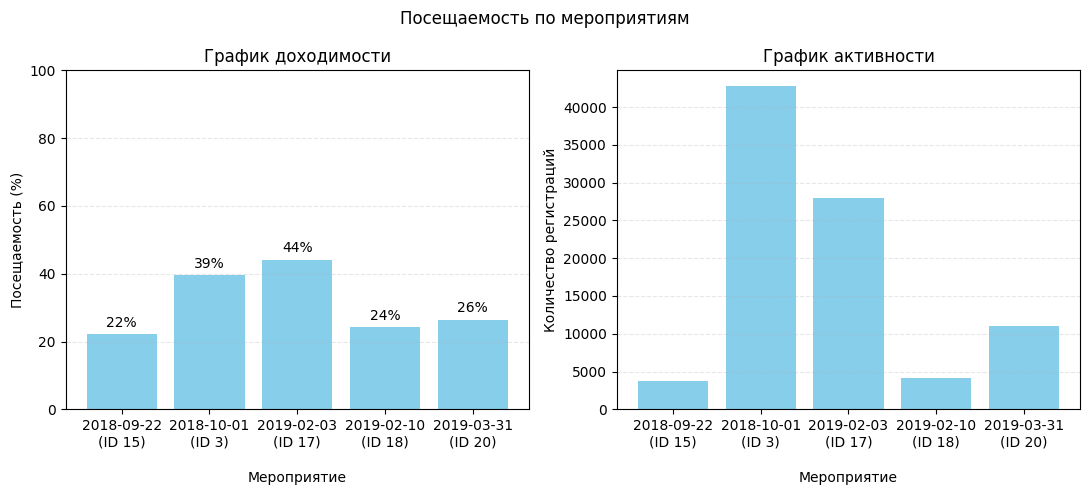

In [ ]:
df = get_attendance(by='EventID', df=new_reg)
df = df.merge(events, left_on='EventID', right_on='ExhibitionID').sort_values('EventDate').reset_index(drop=True)
df['EventName'] = df['EventDate'].astype(str) + '\n(ID ' + df['EventID'].astype(str) + ')\n'
display(df.iloc[:, :4])

draw_attendance_hist(by='EventName', df=df, xlabel='–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ', title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è–º', save=SAVE_ALL_PICTS)

**–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å —É—á–µ–Ω–∏–∫/—Ä–æ–¥–∏—Ç–µ–ª—å:**

Who  Registrations_count  Visits_count  Attendance
0    –î—Ä—É–≥–æ–µ                  154            34   22.077922
1  –†–æ–¥–∏—Ç–µ–ª—å                30873         11156   36.135134
2    –£—á–µ–Ω–∏–∫                58423         22745   38.931585

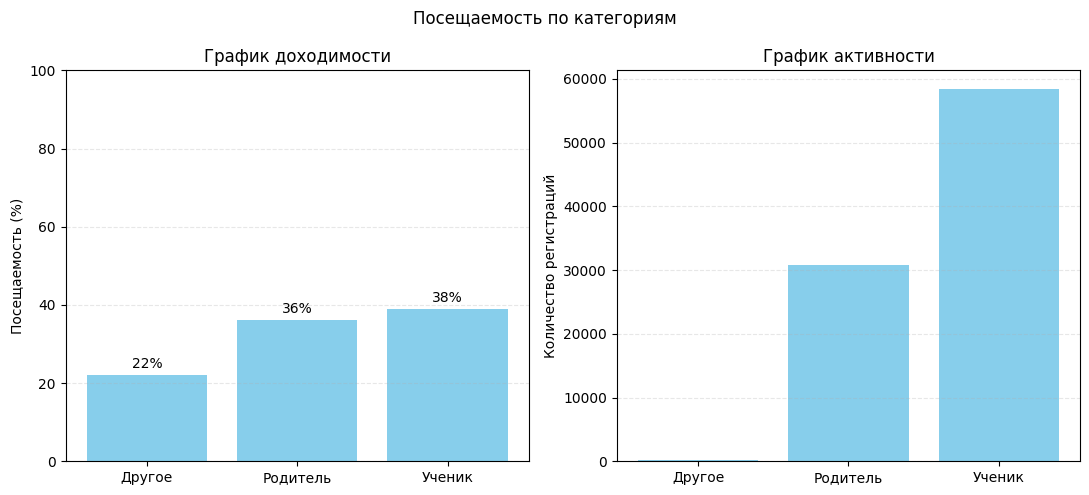

In [ ]:
df = get_attendance(by='Who', df=new_reg)
display(df)
draw_attendance_hist(by='Who', df=df, xlabel='', title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º', save=SAVE_ALL_PICTS)

**–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –∫–ª–∞—Å—Å**

In [ ]:
df = get_attendance(by='Class', df=new_reg)
df['Class'] = df['Class'].astype('int32').astype(str)

display(df)

Class  Registrations_count  Visits_count  Attendance
0      1                  514           162   31.517510
1      2                  146            24   16.438356
2      3                  201            45   22.388060
3      4                  314            53   16.878981
4      5                  620           133   21.451613
5      6                 2097           574   27.372437
6      7                 3820          1083   28.350785
7      8                 7958          2773   34.845439
8      9                16613          6372   38.355505
9     10                20904          8897   42.561232
10    11                28526         11909   41.747879

Class  Registrations_count  Visits_count  Attendance
0      1                  514           162   31.517510
1      2                  146            24   16.438356
2      3                  201            45   22.388060
3      4                  314            53   16.878981
4      5                  620           133   21.451613
5      6                 2097           574   27.372437
6      7                 3820          1083   28.350785
7      8                 7958          2773   34.845439
8      9                16613          6372   38.355505
9     10                20904          8897   42.561232
10    11                28526         11909   41.747879

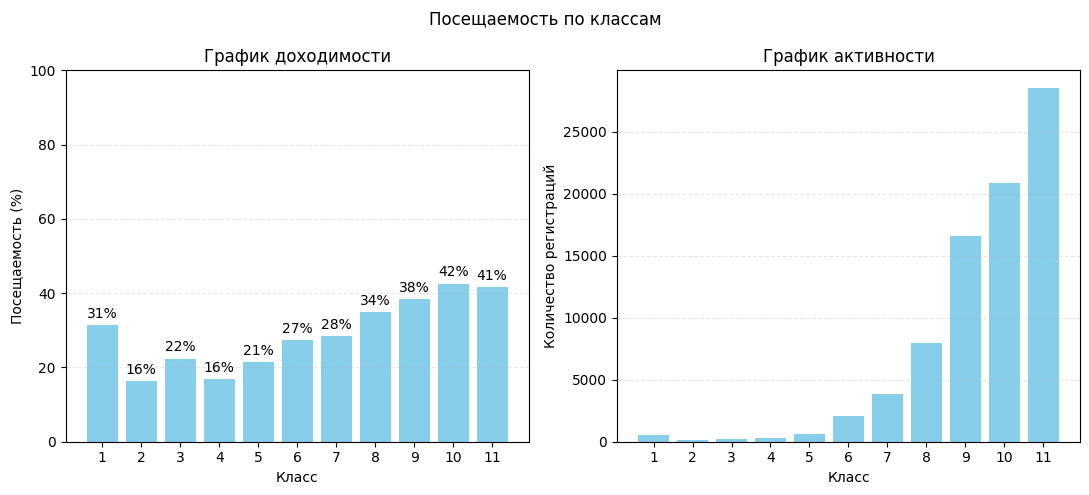

In [ ]:
df = get_attendance(by='Class', df=new_reg)
df['Class'] = df['Class'].astype('int32').astype(str)

display(df)
draw_attendance_hist(by='Class', df=df, xlabel='–ö–ª–∞—Å—Å', title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∫–ª–∞—Å—Å–∞–º', save=SAVE_ALL_PICTS)
# –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é plt.bar() –≤—ã–∫–∏–¥—ã–≤–∞–µ—Ç –≤—Å–µ Nan

**–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å utm_source**

1789.0


utm_source  Registrations_count  Visits_count  Attendance
43          yandex                 2790          1443   51.720430
23         organic                30380         14975   49.292298
26  propostuplenie                10435          3896   37.335889
1         Mailigen                 7372          2695   36.557244
37              vk                 8139          2665   32.743580
10              fb                24022          6144   25.576555
14          import                 1814           453   24.972437
7           –î—Ä—É–≥–æ–µ                 4498          1664   36.994220

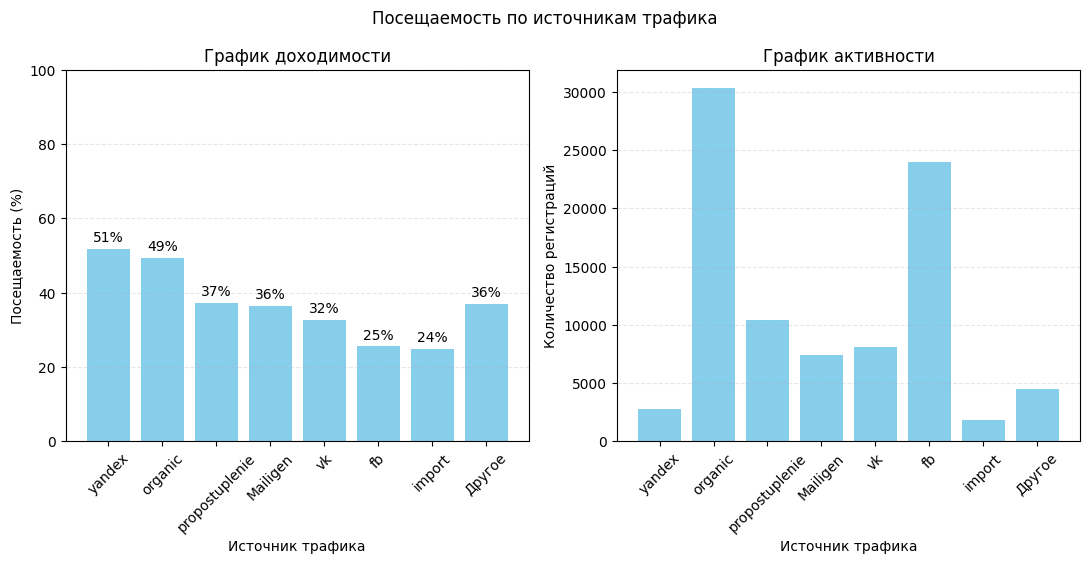

In [ ]:
df = get_attendance(by='utm_source', df=new_reg)

# –µ—Å–ª–∏ –∫–æ–ª-–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –º–µ–Ω—å—à–µ 2,5% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ç–æ —Å–æ–æ—Ç–Ω–æ—Å–∏–º —ç—Ç–æ –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é –æ–±—â—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é - –î—Ä—É–≥–æ–µ
border = df['Registrations_count'].sum()*0.02
print(border)

small_groups = df[df['Registrations_count'] < border].sum()
df = df[df['Registrations_count'] >= border].sort_values(by='Attendance', ascending=False)

df.loc[len(df)] = ['–î—Ä—É–≥–æ–µ', small_groups['Registrations_count'], small_groups['Visits_count'],
                   small_groups['Visits_count'] / small_groups['Registrations_count'] * 100]

display(df)
draw_attendance_hist(by='utm_source', df=df, xlabel='–ò—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞', title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞', save=SAVE_ALL_PICTS, rotate=True)

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ç–∞–±–ª–∏—Ü—É —Å –∞–±—Å–æ–ª—é—Ç–Ω—ã–º–∏ –≤–µ–ª–∏—á–∏–Ω–∞–º–∏. –Ø–Ω–¥–µ–∫—Å —Ö–æ—Ä–æ—à, –Ω–æ –ø–æ—Ç–æ–∫ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –æ—Ç—Ç—É–¥–∞ –Ω–µ–±–æ–ª—å—à–æ–π (–≤–µ—Ä–æ—è—Ç–Ω–æ, –∑–∞–∫–∞–∑—á–∏–∫ –º–∞–ª–æ –∑–∞–∫—É–ø–∞–µ—Ç —Ä–µ–∫–ª–∞–º—ã).  
–õ—É—á—à–µ –≤—Å–µ–≥–æ - –æ—Ä–≥–∞–Ω–∏–∫ (—Ç.–µ. –ª—é–¥–∏ –ø–æ–ø–∞–ª–∏ –±–µ–∑ —Ä–µ–∫–ª–∞–º—ã, –ø—Ä–æ—Å—Ç–æ –∑–∞—Ä–∞–Ω–µ–µ –∏—Å–∫–∞–ª–∏ —Å–∞–π—Ç –∑–∞–∫–∞–∑—á–∏–∫–∞/–≤—ã—à–ª–∏ –Ω–∞ –Ω–µ–≥–æ –∏–∑ –ø–æ–∏—Å–∫–∞). –õ–æ–≥–∏—á–Ω–æ, —á—Ç–æ –æ–Ω–∏ –±—É–¥—É—Ç –Ω–∞–∏–±–æ–ª–µ–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω—ã.  
Facebook –¥–æ–≤–æ–ª—å–Ω–æ –ø–ª–æ—Ö. –°—É–¥—è –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –¥–µ–Ω—å–≥–∏ —Ç—É–¥–∞ —Ç—Ä–∞—Ç—è—Ç—Å—è –Ω–µ–ø–ª–æ—Ö–∏–µ, –∞ –≤–æ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å —ç—Ç–æ–≥–æ –Ω–µ–±–æ–ª—å—à–æ–π (25% —ç—Ç–æ –Ω–µ 0%, –∫–æ–Ω–µ—á–Ω–æ, –Ω–æ –¥–æ–≤–æ–ª—å–Ω–æ –Ω–∏–∑–∫–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Å—Ç–∞–ª—å–Ω–æ–≥–æ).

**–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–≤—è–∑–∫–µ:**

1789.0


utm_source utm_medium  Registrations_count  Visits_count  Attendance  \
95          yandex        cpc                 2727          1412   51.778511   
33         organic    organic                30380         14975   49.292298   
56  propostuplenie     banner                10106          3771   37.314467   
1         Mailigen      email                 7232          2642   36.532080   
75              vk        cpc                 4891          1353   27.663055   
14              fb        cpa                23773          6045   25.428007   
21          import       form                 1814           453   24.972437   
7           –î—Ä—É–≥–æ–µ     –î—Ä—É–≥–æ–µ                 8527          3284   38.512959   

    utm_source + utm_medium  
95             yandex + cpc  
33        organic + organic  
56  propostuplenie + banner  
1          Mailigen + email  
75                 vk + cpc  
14                 fb + cpa  
21            import + form  
7                    –î—Ä—É–≥–æ–µ

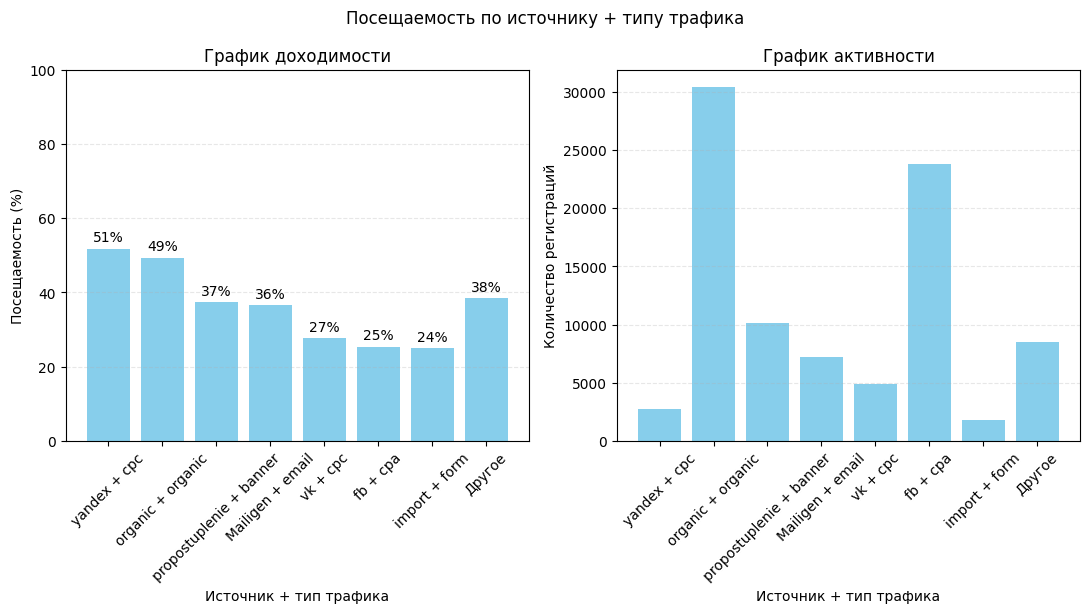

In [ ]:
df = get_attendance(by=['utm_source', 'utm_medium'], df=new_reg)
#df.to_csv('results.csv')

df['utm_source + utm_medium'] = df['utm_source'] + ' + ' + df['utm_medium']
border = df['Registrations_count'].sum()*0.02
print(border)

small_groups = df[df['Registrations_count'] < border].sum()
df = df[df['Registrations_count'] >= border].sort_values(by='Attendance', ascending=False)

df.loc[len(df)] = ['–î—Ä—É–≥–æ–µ', '–î—Ä—É–≥–æ–µ', small_groups['Registrations_count'], small_groups['Visits_count'],
                   small_groups['Visits_count'] / small_groups['Registrations_count'] * 100, '–î—Ä—É–≥–æ–µ']

display(df)
draw_attendance_hist(by='utm_source + utm_medium', df=df, xlabel='–ò—Å—Ç–æ—á–Ω–∏–∫ + —Ç–∏–ø —Ç—Ä–∞—Ñ–∏–∫–∞',
                     title='–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫—É + —Ç–∏–ø—É —Ç—Ä–∞—Ñ–∏–∫–∞', save=SAVE_ALL_PICTS, rotate=True)

–ú–æ–∂–µ—Ç, –≤ —ç—Ç–æ–º –∏ –ø—Ä–æ–±–ª–µ–º–∞ facebook. –£ –Ω–µ–≥–æ –æ—Å–Ω–æ–≤–Ω–æ–π —Ç–∏–ø —Ç—Ä–∞—Ñ–∏–∫–∞ cpa - –ø–ª–∞—Ç–∞ –∑–∞ –ø–æ–∫–∞–∑—ã. –¢.–µ. –æ–Ω –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω –≤ –ø–æ–∫–∞–∑–µ —Ä–µ–∫–ª–∞–º—ã –∫–∞–∫ —Ç–∞–∫–æ–≤–æ–π (–∞ –≤–æ—Ç –ø—Ä–µ–≤—Ä–∞—Ç–∏—Ç—Å—è –ª–∏ –æ–Ω–∞ –≤ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ - –Ω–µ –æ—á–µ–Ω—å).

### 4. –ì–∏–ø–æ—Ç–µ–∑–∞ 1: –í–æ–∑–º–æ–∂–Ω–æ, –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏?  

In [ ]:
def draw_lineplot(by, df, title='', save=False, show=True):
    """
        –ì—Ä–∞—Ñ–∏–∫ —Å–ª–µ–≤–∞ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –ø–æ..
        –ì—Ä–∞—Ñ–∏–∫ —Å–ø—Ä–∞–≤–∞ - –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ..
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.lineplot(data=df, x=by, y='Registrations_count', ax=axes[1])
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
    axes[1].set_title('–ì—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')

    axes[0].grid(alpha=0.3)  # C–µ—Ç–∫–∞ –¥–ª—è 1–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
    axes[1].grid(alpha=0.3)  # Ce—Ç–∫–∞ –¥–ª—è 2–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞

    sns.lineplot(data=df, x=by, y='Attendance', ax=axes[0])
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
    axes[0].set_title('–ì—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏')

    fig.suptitle(title)
    plt.tight_layout()
    if save:
        plt.savefig(title + '.png', format='png', dpi=100, bbox_inches='tight')
    if show:
        plt.show()

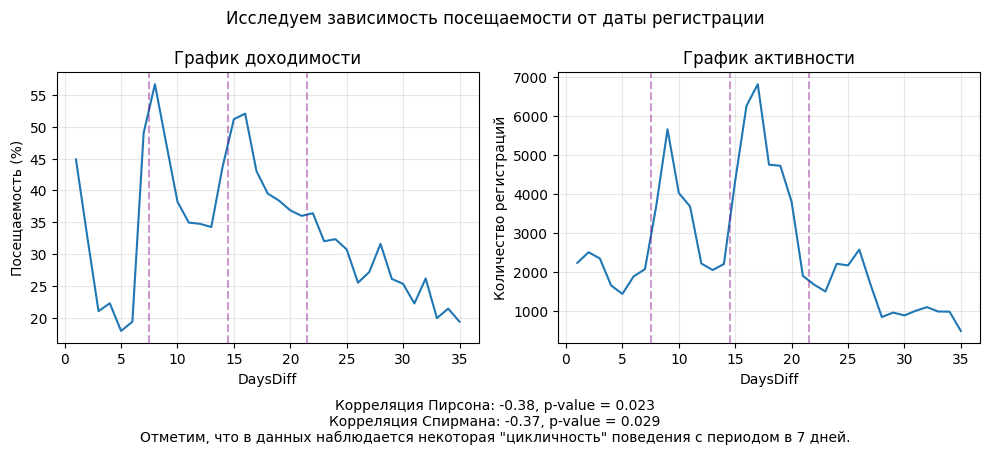

In [ ]:
df = get_attendance('DaysDiff', new_reg)
res = stats.pearsonr(df['DaysDiff'], df['Attendance'])
res2 = stats.spearmanr(df['DaysDiff'], df['Attendance'])

draw_lineplot('DaysDiff', df, title='–ò—Å—Å–ª–µ–¥—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏ –æ—Ç –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏', show=False)
fig = plt.gcf()
ax = fig.get_axes()
for i in range(2):
    ax[i].axvline(x=7.5, color='purple', linestyle='--', alpha=0.4)
    ax[i].axvline(x=14.5, color='purple', linestyle='--', alpha=0.4)
    ax[i].axvline(x=21.5, color='purple', linestyle='--', alpha=0.4)
text = f"""
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞: {res[0]:.2f}, p-value = {res[1]:.3f}\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–∞–Ω–∞: {res2[0]:.2f}, p-value = {res2[1]:.3f}\n–û—Ç–º–µ—Ç–∏–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–µ–∫–æ—Ç–æ—Ä–∞—è "—Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å" –ø–æ–≤–µ–¥–µ–Ω–∏—è —Å –ø–µ—Ä–∏–æ–¥–æ–º –≤ 7 –¥–Ω–µ–π.
"""
fig.text(0.5, -0.05, text, ha='center', va='center', wrap=True)
if SAVE_ALL_PICTS:
    plt.savefig('–ü–æ –¥–Ω—è–º –±–µ–∑ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

**–°–≥–ª–∞–¥–∏–º —Ç—Ä–µ–Ω–¥ –ø–æ –Ω–µ–¥–µ–ª—è–º!**  
–ü–æ–ø—Ä–æ–±—É–µ–º —Å–≥–ª–∞–¥–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –Ω–µ–¥–µ–ª—è–º, —á—Ç–æ–±—ã —É—á–µ—Å—Ç—å —Ü–∏–∫–ª–∏—á–Ω—ã–µ –ø–∏–∫–∏/—Å–ø–∞–¥—ã

N_of_week  Registrations_count  Visits_count  Attendance
0          0                10202          2951   28.925701
1          1                23254          9759   41.966973
2          2                31156         13776   44.216202
3          3                15859          5225   32.946592
4          4                 7496          1916   25.560299
5          5                 1483           308   20.768712

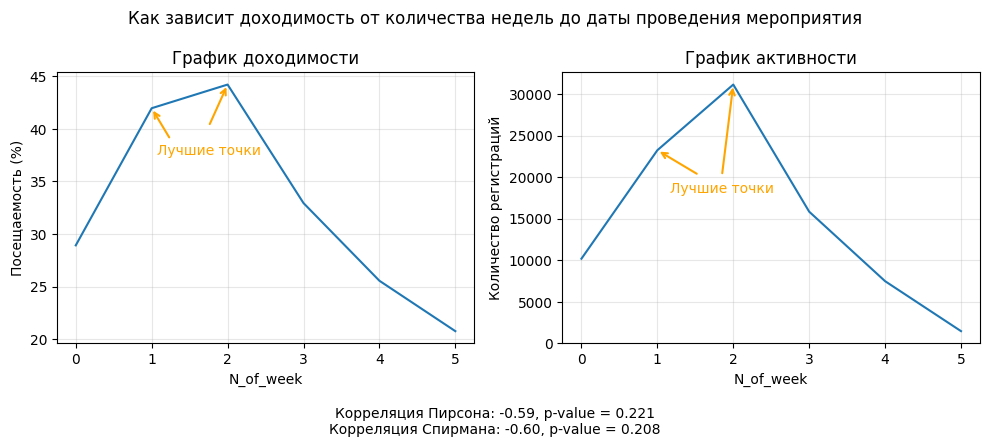

In [ ]:
# –ù–æ–º–µ—Ä –Ω–µ–¥–µ–ª–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥–∞—Ç—ã –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è:
new_reg['N_of_week'] = (new_reg['DaysDiff'] + 1) // 7
df = get_attendance(by='N_of_week', df=new_reg)

res = stats.pearsonr(df['N_of_week'].astype(int), df['Attendance'])
res2 = stats.spearmanr(df['N_of_week'].astype(int), df['Attendance'])

display(df)
df['N_of_week'] = df['N_of_week'].astype(str)
draw_lineplot(by='N_of_week', df=df, title='–ö–∞–∫ –∑–∞–≤–∏—Å–∏—Ç –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–µ–¥–µ–ª—å –¥–æ –¥–∞—Ç—ã –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è', show=False)

fig = plt.gcf()
ax = fig.get_axes()

# —Å—Ç—Ä–µ–ª–æ—á–∫–∏ –¥–ª—è –ø—Ä–∞–≤–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
x, y = df.iloc[2, [0, 3]].values
x = int(x)
ax[0].annotate('', xy=(x, y), xytext=(x-0.25, y-4),arrowprops=dict(arrowstyle='->', lw=1.5, color='orange'))
ax[0].text(x-0.25, y - 6.7, '–õ—É—á—à–∏–µ —Ç–æ—á–∫–∏', ha='center', fontsize=10, color='orange')

x, y = df.iloc[1, [0, 3]].values
x = int(x)
ax[0].annotate('', xy=(x, y), xytext=(x+0.25, y-3),arrowprops=dict(arrowstyle='->', lw=1.5, color='orange'))

# —Å—Ç—Ä–µ–ª–æ—á–∫–∏ –¥–ª—è –ª–µ–≤–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
x, y = df.iloc[2, [0, 1]].values
x = int(x)
ax[1].annotate('', xy=(x, y), xytext=(x-0.15, y-11000),arrowprops=dict(arrowstyle='->', lw=1.5, color='orange'))
ax[1].text(x - 0.15, y - 13000, '–õ—É—á—à–∏–µ —Ç–æ—á–∫–∏', ha='center', fontsize=10, color='orange')

x, y = df.iloc[1, [0, 1]].values
x = int(x)
ax[1].annotate('', xy=(x, y), xytext=(x+0.55, y-3000),arrowprops=dict(arrowstyle='->', lw=1.5, color='orange'))

text=f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞: {res[0]:.2f}, p-value = {res[1]:.3f}\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–∞–Ω–∞: {res2[0]:.2f}, p-value = {res2[1]:.3f}'
#text = "–ü–æ—á–µ–º—É –º—ã –Ω–∞–±–ª—é–¥–∞–µ–º —Ç–æ, —á—Ç–æ –Ω–∞–±–ª—é–¥–∞–µ–º?\n1. –û—á–Ω—ã–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ—É–¥–æ–±–Ω—ã –¥–ª—è —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤, –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–≤—à–∏—Ö—Å—è –Ω–∞–∫–∞–Ω—É–Ω–µ.\n2. –†–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –∑–∞ 3-4 –Ω–µ–¥–µ–ª–∏ –¥–æ —Å–æ–±—ã—Ç–∏—è –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –ø–æ—Ç–µ—Ä—è–º –∏–Ω—Ç–µ—Ä–µ—Å–∞.\n3. –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Å—Ä–æ–∫ –¥–ª—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ ‚Äî 1-2 –Ω–µ–¥–µ–ª–∏ –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è (7-20 –¥–Ω–µ–π –¥–æ –Ω–∞—á–∞–ª–∞)."
fig.text(0.5, -0.05, text, ha='center', va='center', wrap=True)
if SAVE_ALL_PICTS:
    plt.savefig('–ü–æ –¥–Ω—è–º –ø–æ—Å–ª–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è (–ü–∏—Ä—Å–æ–Ω - –ö–µ–Ω–¥–∞–ª–ª - –°–ø–∏—Ä–º–∞–Ω):
# 0.42 0.38 0.38 –±–µ–∑ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
# 0.48 0.4 0.6 –ø–æ—Å–ª–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø–æ –Ω–µ–¥–µ–ª—è–º
print(res)
print(res2)
# —Ç.–∫. pvalue –±–æ–ª—å—à–æ–µ, –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è —Ç.–µ. —Å—Ç—Ä–æ–≥–æ–π –ª–∏–Ω–µ–π–Ω–æ–π/–º–æ–Ω–æ—Ç–æ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –Ω–µ —É–¥–∞–ª–æ—Å—å (–ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ)

PearsonRResult(statistic=-0.5867552824501806, pvalue=0.2208716474254868)
SignificanceResult(statistic=-0.6, pvalue=0.20799999999999982)


**–ö–∞–∫–∏–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã:**
1. –ü–æ–º–Ω–∏–º, —á—Ç–æ –≤—Å–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –æ—á–Ω—ã–µ! –¢.–µ. –ª—é–¥—è–º –Ω–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ –∏–¥—Ç–∏ –Ω–∞ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–µ –æ–Ω–∏ –∑–∞–ø–∏—Å–∞–ª–∏—Å—å –Ω–∞–∫–∞–Ω—É–Ω–µ (–Ω–µ–∑–∞–∫–æ–Ω—á–µ–Ω–Ω—ã–µ –¥–µ–ª–∞, –≤—Ä–µ–º—è –Ω–µ —É–¥–∞–ª–æ—Å—å –≤—ã–¥–µ–ª–∏—Ç—å –∏ –≤–æ–æ–±—â–µ –º–æ—Ä–∞–ª—å–Ω–æ –Ω–µ –≥–æ—Ç–æ–≤ - –ª–µ–Ω—å –∏–¥—Ç–∏)
2. –ù–æ –∏ —Å–ª–∏—à–∫–æ–º —Ä–∞–Ω–æ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–µ —Å–ª—É—à–∞—Ç–µ–ª–∏, —Ç.–µ. –∑–∞ 3-4 –Ω–µ–¥–µ–ª–∏ –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è, –±–∞–Ω–∞–ª—å–Ω–æ —Ç–µ—Ä—è—é—Ç –∏–Ω—Ç–µ—Ä–µ—Å/–∑–∞–±—ã–≤–∞—é—Ç
3. –û–ø—Ç–∏–º–∞–ª—å–Ω–æ: 1-2 –Ω–µ–¥–µ–ª–∏ –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è (—Ç.–µ. 7-20 –¥–Ω–∏ –¥–æ –Ω–∞—á–∞–ª–∞)

### 4. –ì–∏–ø–æ—Ç–µ–∑–∞ 2: –í–æ–∑–º–æ–∂–Ω–æ, –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏?

In [ ]:
# 0 - –ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫
# 6 - –í–æ—Å–∫—Ä–µ—Å–µ–Ω–∏–µ
new_reg['Weekday'] = new_reg['Created'].dt.weekday.astype(int)

Weekday  Registrations_count  Visits_count  Attendance
0        0                 6725          2252   33.486989
1        1                 8865          2853   32.182741
2        2                11231          3803   33.861633
3        3                12435          4434   35.657419
4        4                15224          5897   38.734892
5        5                13858          6920   49.935056
6        6                 6940          3440   49.567723

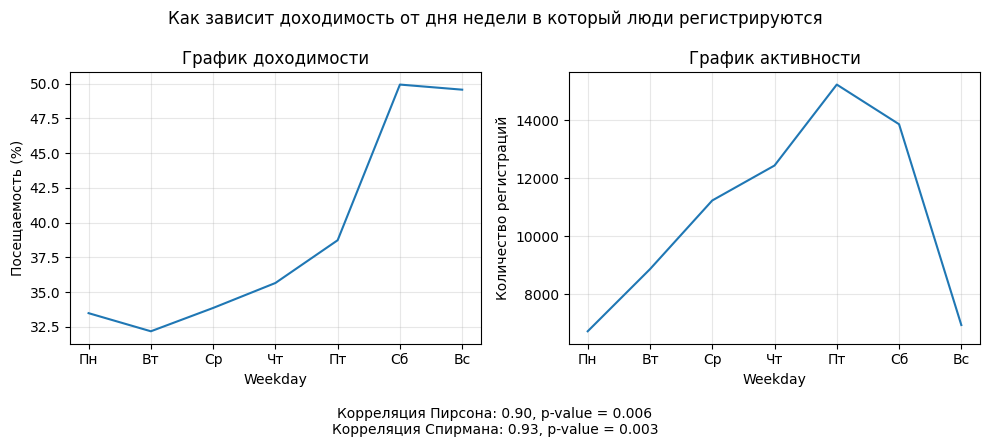

In [ ]:
# –ü–æ—á–µ–º—É –º—ã –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ –¥–Ω–∏ —á–µ—Ä–µ–∑ –Ω–µ–¥–µ–ª—é –ø–æ—Å–ª–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π –æ–±—ä—è—Å–Ω–µ–Ω–æ –≤ –≤—ã–≤–æ–¥–∞—Ö –Ω–∏–∂–µ
df = get_attendance(by='Weekday', df=new_reg[new_reg['DaysDiff'] > 7])
display(df)
res = stats.pearsonr(df['Weekday'].astype(int), df['Attendance'])
res2 = stats.spearmanr(df['Weekday'].astype(int), df['Attendance'])

days_dict = {0: '–ü–Ω', 1: '–í—Ç', 2: '–°—Ä', 3: '–ß—Ç', 4: '–ü—Ç', 5: '–°–±', 6: '–í—Å'}
df['Weekday'] = df['Weekday'].map(days_dict)
draw_lineplot(by='Weekday', df=df, title='–ö–∞–∫ –∑–∞–≤–∏—Å–∏—Ç –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –≤ –∫–æ—Ç–æ—Ä—ã–π –ª—é–¥–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É—é—Ç—Å—è', save=False, show=False)

fig = plt.gcf()
text=f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞: {res[0]:.2f}, p-value = {res[1]:.3f}\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–∞–Ω–∞: {res2[0]:.2f}, p-value = {res2[1]:.3f}'
fig.text(0.5, -0.05, text, ha='center', va='center', wrap=True)
if SAVE_ALL_PICTS:
    plt.savefig('–ö–∞–∫ –∑–∞–≤–∏—Å–∏—Ç –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –≤ –∫–æ—Ç–æ—Ä—ã–π –ª—é–¥–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É—é—Ç—Å—è.png', dpi=100, bbox_inches='tight')
plt.show()

**–ö–∞–∫–∏–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã:**
1. –ú—ã –±—Ä–∞–ª–∏ —Ç–æ–ª—å–∫–æ –ª—é–¥–µ–π —Å –¥–∞—Ç–∞–º–∏ –∑–∞ –Ω–µ–¥–µ–ª—é –∏ –±–æ–ª–µ–µ –¥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è —á—Ç–æ–±—ã –∏—Å–∫–ª—é—á–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –±–ª–∏–∑–æ—Å—Ç—å—é –¥–∞—Ç—ã –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è (—Ç.–µ. –µ—Å–ª–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ –≤ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω–∏–µ, —Ç–æ –Ω–∞–ø–ª—ã–≤ –ª—é–¥–µ–π –≤ –ø—è—Ç–Ω–∏—Ü—É —Å–∫–æ—Ä–µ–µ –æ–±—ä—è—Å–Ω–µ–Ω —ç—Ç–∏–º —Ñ–∞–∫—Ç–æ—Ä–æ–º). *P.S. –¥–∞–∂–µ –µ—Å–ª–∏ –≤–∑—è—Ç—å –≤—Å–µ –¥–∞—Ç—ã - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–µ –∏–∑–º–µ–Ω–∏—Ç—Å—è.*

2. –ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ –ª—é–¥–∏ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç—Å—è –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è–º–∏ –∑–∞–∫–∞–∑—á–∏–∫–∞ –≤ –ø—è—Ç–Ω–∏—Ü—É-—Å—É–±–±–æ—Ç—É, –∞ –Ω–∞–∏–±–æ–ª—å—à–∞—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è —É –Ω–∞—Å –≤ —Å—É–±–±–æ—Ç—É-–≤–æ—Å–∫—Ä–µ—Å–µ–Ω–∏–µ. –¢.–µ. —Å–∞–º—ã–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –¥–Ω–∏ –¥–ª—è —Ä–µ–∫–ª–∞–º—ã - –ø—è—Ç–Ω–∏—Ü–∞-—Å—É–±–±–æ—Ç–∞. –û—Å–æ–±–µ–Ω–Ω–æ —Å—É–±–±–æ—Ç–∞.

–ú—ã, –∫—Å—Ç–∞—Ç–∏, —Å–µ–π—á–∞—Å –ø–æ—Å–º–æ—Ç—Ä–∏–º –∏ –ø–æ–∫–∞–∂–µ–º, –ø–æ—á–µ–º—É —É facebook –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –¥–æ–≤–æ–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π (–ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∑–∞–∫–∞–∑—á–∏–∫ —Ç—Ä–∞—Ç–∏—Ç –º–Ω–æ–≥–æ –¥–µ–Ω–µ–≥ –Ω–∞ —Ä–µ–∫–ª–∞–º—É —Ç–∞–º) —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ä–µ–¥–Ω–∏–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –ø–æ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ (—Ç.–µ. –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏: –ø—Ä–µ–≤—Ä–∞—â–µ–Ω–∏–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –≤ –≤–∏–∑–∏—Ç –Ω–∞ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ). –ê —Ç–æ—Ç –∂–µ —è–Ω–¥–µ–∫—Å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è –ø–æ–ª—É—á—à–µ.

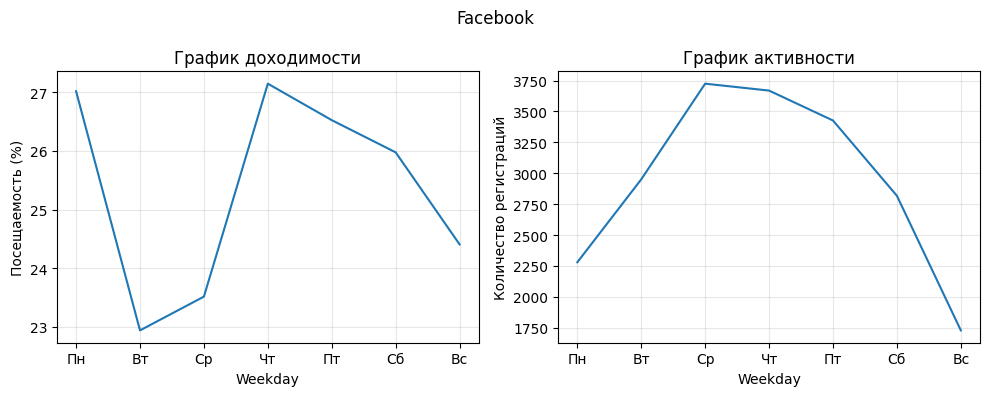

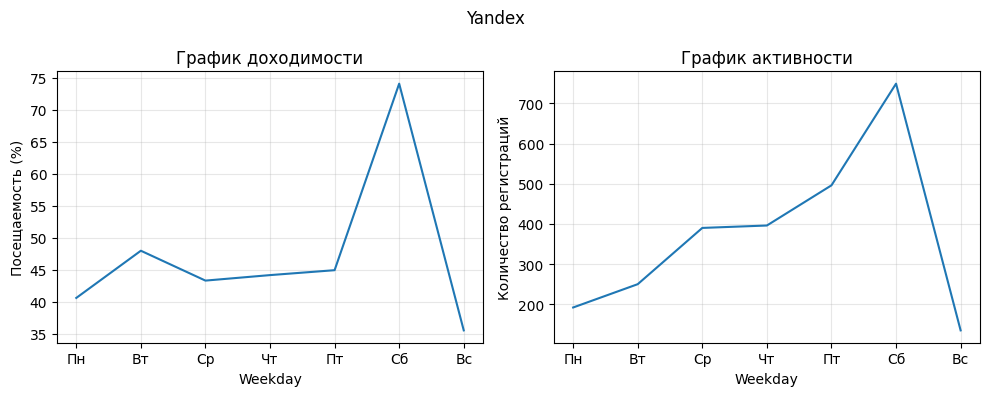

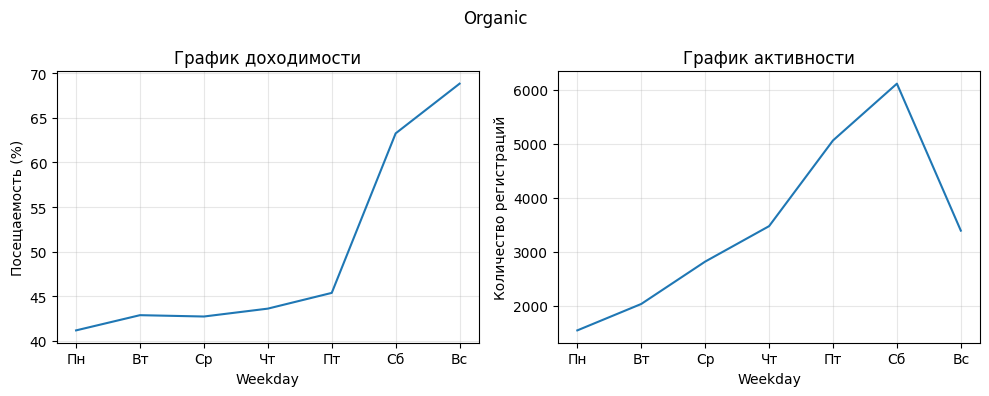

In [ ]:
df = get_attendance(by='Weekday', df=new_reg[(new_reg['DaysDiff'] > 7) & (new_reg['utm_source'] == 'fb')])
df['Weekday'] = df['Weekday'].map(days_dict)
draw_lineplot(by='Weekday', df=df, title='Facebook', save=SAVE_ALL_PICTS)

df = get_attendance(by='Weekday', df=new_reg[(new_reg['DaysDiff'] > 7) & (new_reg['utm_source'] == 'yandex')])
df['Weekday'] = df['Weekday'].map(days_dict)
draw_lineplot(by='Weekday', df=df, title='Yandex', save=SAVE_ALL_PICTS)

df = get_attendance(by='Weekday', df=new_reg[(new_reg['DaysDiff'] > 7) & (new_reg['utm_source'] == 'organic')])
df['Weekday'] = df['Weekday'].map(days_dict)
draw_lineplot(by='Weekday', df=df, title='Organic', save=SAVE_ALL_PICTS)

* Facebook –ø—Ä–∏–≤–æ–¥–∏—Ç –º–Ω–æ–≥–æ –ª—é–¥–µ–π –ø–æ —Å—Ä–µ–¥–∞–º-–ø—è—Ç–Ω–∏—Ü–∞–º (–∫–æ–≥–¥–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏—è –Ω—É —Ç–∞–∫ —Å–µ–±–µ) –∏ –æ—á–µ–Ω—å –º–∞–ª–æ –≤ —Å–∞–º—ã–π –≤—ã–∏–≥—Ä—ã—à–Ω—ã–π –¥–ª—è –Ω–∞—Å –¥–µ–Ω—å - —Å—É–±–±–æ—Ç—É!  
* –Ø–Ω–¥–µ–∫—Å –∫–∞–∫ —Ä–∞–∑ —Ü–µ–ª–∏—Ç —Å–≤–æ—é —Ä–µ–∫–ª–∞–º—É –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –Ω–∞ –ø—è—Ç–Ω–∏—Ü—É-—Å—É–±–±–æ—Ç—É –∏ –∏–º–µ–µ—Ç —Å —ç—Ç–æ–≥–æ —Ö–æ—Ä–æ—à—É—é –∫–æ–Ω–≤–µ—Ä—Å–∏—é.  

–ü–ª—é—Å, —è–Ω–¥–µ–∫—Å - —ç—Ç–æ –∞–π—Ç–∏ –≥–∏–≥–∞–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ö–æ—Ä–æ—à–æ –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ—Ç –Ω–∞—à—É –≥–µ–æ–ª–æ–∫–∞—Ü–∏—é –∏ –º–æ–∂–µ—Ç —Ç–æ—á–Ω–µ–µ –Ω–∞—Ü–µ–ª–∏—Ç—å —Ä–µ–∫–ª–∞–º—É (–Ω–µ –∑–∞–±—ã–≤–∞–µ–º, –≤—Å–µ –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –æ—á–Ω—ã–µ, –º–∞–ª–æ –∫—Ç–æ –∑–∞—Ö–æ—á–µ—Ç –ø–æ–µ—Ö–∞—Ç—å —Ä–∞–¥–∏ –Ω–∏—Ö –≤ –¥—Ä—É–≥–æ–π –≥–æ—Ä–æ–¥ –∏–ª–∏ –¥–∞–ª—å–Ω–∏–π —Ä–∞–π–æ–Ω). –≠—Ç–æ –∫–æ—Å–≤–µ–Ω–Ω–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –≤—ã—Å–æ–∫–æ–π –∫–æ–Ω–≤–µ—Ä—Å–∏–µ–π —É –ø–æ—Ö–æ–∂–µ–≥–æ –Ω–∞ –Ω–µ–≥–æ –≥—É–≥–ª–∞ (–Ω–æ —Ç–∞–º –º–∞–ª–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –∫–∞–∫ —Ç–∞–∫–æ–≤—ã—Ö, –ø–æ—ç—Ç–æ–º—É –æ–Ω –Ω–∏–≥–¥–µ –≤—ã—à–µ –Ω–µ —Ñ–∏–≥—É—Ä–∏—Ä—É–µ—Ç)

### –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É:  
–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å —Å —Ñ–µ–π—Å–±—É–∫–∞ —Ç–∞–∫–∞—è –∂–µ –∫–∞–∫ —Å —è–Ω–¥–µ–∫—Å–∞ –∏ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–æ–≥–æ —Ç—Ä–∞—Ñ–∏–∫–∞  
–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å —Å —Ñ–µ–π—Å–±—É–∫–∞ —Ö—É–∂–µ

In [ ]:
to_compare = ['organic', 'propostuplenie', 'fb', 'yandex', 'vk', 'Mailigen']
get_attendance('utm_source', new_reg[(new_reg['EventID'] == 17) & (new_reg['utm_source'].isin(to_compare))])

utm_source  Registrations_count  Visits_count  Attendance
0        Mailigen                 2990          1075   35.953177
1              fb                 6458          2031   31.449365
2         organic                 9410          5328   56.620616
3  propostuplenie                 3073          1360   44.256427
4              vk                 2171           806   37.125749
5          yandex                  907           574   63.285557

In [ ]:
for n in [3, 17, 15, 18, 20]:
    df = get_attendance('utm_source', new_reg[(new_reg['EventID'] == n) & (new_reg['utm_source'].isin(to_compare))])
    p_val = []
    alpha = 0.01

    for i in [0, 2, 3, 4, 5]:
        successes = np.array([df.loc[1, 'Visits_count'], df.loc[i, 'Visits_count']])
        trials = np.array([df.loc[1, 'Registrations_count'], df.loc[i, 'Registrations_count']])
        _, p = sm.stats.proportions_ztest(successes, trials, alternative='smaller')
        p_val.append(p)

    reject, pval_corrected, _, _ = multipletests(p_val, alpha=alpha, method='bonferroni') #'fdr_bh' 'bonferroni'
    print("–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π:", reject)

–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: [ True  True  True  True  True]
–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: [ True  True  True  True  True]
–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: [False  True  True False False]
–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: [ True  True False False  True]
–û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã –ª–∏ –Ω—É–ª–µ–≤—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: [ True False  True False  True]


* –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —É–¥–∞–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –¥–ª—è –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤: Mailigen, organic, propostuplenie –∏ yandex.  
* –ù–æ –Ω–µ —É–¥–∞–ª–æ—Å—å –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –¥–ª—è vk.

### 4. –ì–∏–ø–æ—Ç–µ–∑–∞ 3: –í–æ–∑–º–æ–∂–Ω–æ, –µ—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —á–∞—Å—ã, –≤ –∫–æ—Ç–æ—Ä—ã–µ –ª—é–¥–∏ –ª—É—á—à–µ –æ–±—Ä–∞—â–∞—é—Ç—Å—è –≤ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π?
–≠—Ç–æ —Å–∫–æ—Ä–µ–µ –≤–æ–ø—Ä–æ—Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–µ–Ω–µ–≥: —Å–æ–∫—Ä–∞—Ç–∏—Ç—å –≤—Ä–µ–º—è –ø–æ–∫–∞–∑–∞ —Ä–µ–∫–ª–∞–º—ã –¥–æ —Å–∞–º—ã—Ö —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —á–∞—Å–æ–≤.

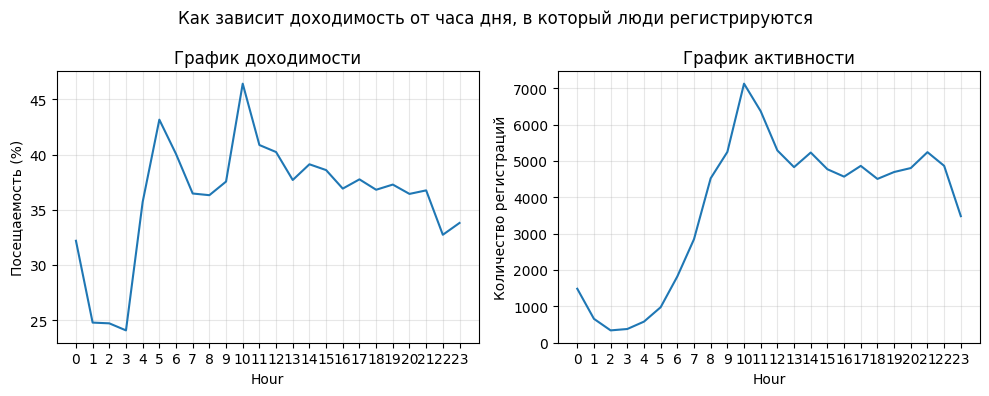

In [ ]:
new_reg['Hour'] = new_reg['Created'].dt.hour.astype(int)
df = get_attendance(by='Hour', df=new_reg)

#display(df)
df['Hour'] = df['Hour'].astype(str)
draw_lineplot(by='Hour', df=df, title='–ö–∞–∫ –∑–∞–≤–∏—Å–∏—Ç –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ—Ç —á–∞—Å–∞ –¥–Ω—è, –≤ –∫–æ—Ç–æ—Ä—ã–π –ª—é–¥–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É—é—Ç—Å—è', save=SAVE_ALL_PICTS)

In [ ]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è (–ü–∏—Ä—Å–æ–Ω - –ö–µ–Ω–¥–∞–ª–ª - –°–ø–∏—Ä–º–∞–Ω):
# 0.32 0.015 0.16
# –ª–∏–Ω–µ–π–Ω–∞—è/–º–æ—Ç–æ–Ω–æ–Ω–Ω–∞—è —Å—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º–∞
print(stats.pearsonr(df['Hour'].astype(int), df['Attendance']))
print(stats.spearmanr(df['Hour'].astype(int), df['Attendance']))

PearsonRResult(statistic=0.31843067870439123, pvalue=0.12939294583485952)
SignificanceResult(statistic=0.18086956521739128, pvalue=0.39767420741690407)


* –í –æ–±—â–µ–º, –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ —á–∞—Å—ã: —Å 9 —É—Ç—Ä–∞ –¥–æ 21 –≤–µ—á–µ—Ä–∞.
* –ê –≤ 10-11 —á–∞—Å–æ–≤ —É –Ω–∞—Å –≤–æ–æ–±—â–µ –ø–∏–∫ –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏.

### 5. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
def get_analyz_by(dataframe, ids=[3, 17], palette='pastel'):
    """–§—É–Ω–∫—Ü–∏—è –≤—ã–≤–æ–¥–∏ —Å—Ä–∞–∑—É 3 –≥—Ä–∞—Ñ–∏–∫–∞ –ø–æ –∞–Ω–∞–ª–∏–∑—É –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º
        df - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        ids - —Å–ø–∏—Å–æ–∫ id –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
    """
    # –≥—Ä–∞—Ñ–∏–∫ –ø–µ—Ä–≤—ã–π:
    df = get_attendance(by='EventID', df=dataframe[dataframe['EventID'].isin(ids)])
    df['EventID'] = df['EventID'].astype(str)

    tmp = get_attendance(by='EventID', df=new_reg)
    avg_attendance = tmp['Attendance'].mean()

    # avg_attendance = df['Visits_count'].sum() / df['Registrations_count'].sum() * 100
    avg_registrations_count = tmp['Registrations_count'].mean()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].set_title('–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å')
    axes[1].set_title('–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å')
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')  # –ò–∑–º–µ–Ω–µ–Ω–æ
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')  # –ò–∑–º–µ–Ω–µ–Ω–æ
    axes[0].axhline(y=avg_attendance, color='red', linestyle='--', label=f'–°—Ä–µ–¥–Ω—è—è –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å: {avg_attendance:.2f}%')
    sns.barplot(df, x='EventID', y='Attendance', color='skyblue', ax=axes[0])
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
    axes[1].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞

    axes[1].axhline(y=avg_registrations_count, color='red',
                    linestyle='--', label=f'–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π {avg_registrations_count:.0f}')

    sns.barplot(df, x='EventID', y='Registrations_count', color='skyblue', ax=axes[1])

    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏
    for i, row in df.iterrows():
        axes[0].text(i, row['Attendance'] + 2, f"{row['Attendance']:.0f}%", ha='center', va='bottom', fontsize=9)

    # # –ì—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
    # sns.barplot(df, x='EventID', y='Registrations_count', color='skyblue', ax=axes[1])
    # axes[1].grid(axis='y', linestyle='--', alpha=0.3)

    # # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
    # for i, row in df.iterrows():
    #     axes[1].text(i, row['Registrations_count'] + 2, f"{row['Registrations_count']:.0f}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()

    if SAVE_ALL_PICTS:
        plt.savefig('p1.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

    # –≥—Ä–∞—Ñ–∏–∫ –≤—Ç–æ—Ä–æ–π:
    tmp = get_attendance(by='Who', df=new_reg)

    parents_avg = tmp.loc[tmp['Who'] == '–†–æ–¥–∏—Ç–µ–ª—å', 'Attendance'].values[0]
    children_avg = tmp.loc[tmp['Who'] == '–£—á–µ–Ω–∏–∫', 'Attendance'].values[0]

    parents_avg_registrations = tmp.loc[tmp['Who'] == '–†–æ–¥–∏—Ç–µ–ª—å', 'Registrations_count'].values[0] / 5
    children_avg_registrations = tmp.loc[tmp['Who'] == '–£—á–µ–Ω–∏–∫', 'Registrations_count'].values[0] / 5


    df = get_attendance(by=['Who', 'EventID'], df=dataframe[(dataframe['Who'] != '–î—Ä—É–≥–æ–µ') & (dataframe['EventID'].isin(ids))])
    # parents_avg = df[df['Who'] == '–†–æ–¥–∏—Ç–µ–ª—å']['Visits_count'].sum() / df[df['Who'] == '–†–æ–¥–∏—Ç–µ–ª—å']['Registrations_count'].sum() * 100
    # children_avg = df[df['Who'] == '–£—á–µ–Ω–∏–∫']['Visits_count'].sum() / df[df['Who'] == '–£—á–µ–Ω–∏–∫']['Registrations_count'].sum() * 100

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].set_title('–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å')
    axes[1].set_title('–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å')
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
    sns.barplot(df, x='Who', y='Attendance', hue='EventID', palette=palette, ax = axes[0])
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
    axes[1].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
    axes[0].axhline(y=parents_avg, xmax=0.5, color='blue', linestyle='--', alpha=0.5)
    axes[0].axhline(y=children_avg, xmin=0.5, color='blue', linestyle='--', alpha=0.5)
    axes[0].hlines(y=0, xmin=0, xmax=0,  colors='blue', linestyles='--', label=f'–°—Ä–µ–¥–Ω—è—è –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏')
    axes[1].hlines(y=0, xmin=0, xmax=0,  colors='blue', linestyles='--', label=f'–°—Ä–µ–¥–Ω—è—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏')

    axes[1].axhline(y=parents_avg_registrations, xmax=0.5, color='blue', linestyle='--', alpha=0.5)
    axes[1].axhline(y=children_avg_registrations, xmin=0.5, color='blue', linestyle='--', alpha=0.5)

    axes[0].legend()
    sns.barplot(df, x='Who', y='Registrations_count', hue='EventID', palette=palette, ax=axes[1])

    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏
    for i, bar in enumerate(axes[0].patches):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f"{height:.0f}%",
                     ha='center', va='bottom', fontsize=9)

    plt.tight_layout()

    if SAVE_ALL_PICTS:
        plt.savefig('p2.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

    # –≥—Ä–∞—Ñ–∏–∫ —Ç—Ä–µ—Ç–∏–π:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].set_title('–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å')
    axes[1].set_title('–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å')
    axes[0].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
    df = get_attendance(by=['Class', 'EventID'], df=dataframe[dataframe['EventID'].isin(ids)])
    df['Class'] = df['Class'].astype(int).astype(str)
    sns.barplot(df, x='Class', y='Attendance', hue='EventID', palette=palette, ax=axes[0])
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
    axes[1].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞

    tmp = get_attendance(by='Class', df=new_reg)
    tmp['Class'] = tmp['Class'].astype('int32').astype(str)
    # display(tmp)

    for i in range(11):
        avg = tmp.loc[tmp['Class'] == str(i + 1), 'Attendance'].values[0]
        avg_reg = tmp.loc[tmp['Class'] == str(i + 1), 'Registrations_count'].values[0] / 5

        #axes[0].axhline(y=avg, xmin=i * 1 / 11, xmax=(i + 1) / 11, color='blue', linestyle='--', alpha=0.5)
        #axes[1].axhline(y=avg_reg, xmin=i * 1 / 11, xmax=(i + 1) / 11, color='blue', linestyle='--', alpha=0.5)
        axes[0].axhline(y=avg, xmin=1 / 24 + i * 1 / 12, xmax=1 / 24 + (i + 1) / 12, color='blue', linestyle='--', alpha=0.5)
        axes[1].axhline(y=avg_reg, xmin=1 / 24 + i * 1 / 12, xmax=1 / 24 + (i + 1) / 12, color='blue', linestyle='--', alpha=0.5)

    # for i in range (11):
    #     avg = df[df['Class'] == str(i + 1)]['Visits_count'].sum() / df[df['Class'] == str(i + 1)]['Registrations_count'].sum() * 100
    #     axes[0].axhline(y=avg, xmin = i*1/11, xmax=(i+1)/11, color='blue', linestyle='--')

    axes[0].hlines(y=0, xmin=0, xmax=0,  colors='blue', linestyles='--', label=f'–°—Ä–µ–¥–Ω—è—è –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞')
    axes[1].hlines(y=0, xmin=0, xmax=0,  colors='blue', linestyles='--', label=f'–°—Ä–µ–¥–Ω—è—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞')
    sns.barplot(df, x='Class', y='Registrations_count', hue='EventID', palette=palette, ax=axes[1])
    axes[0].legend()
    plt.tight_layout()
    if SAVE_ALL_PICTS:
        plt.savefig('p3.png', format='png', dpi=100, bbox_inches='tight')
    plt.show()

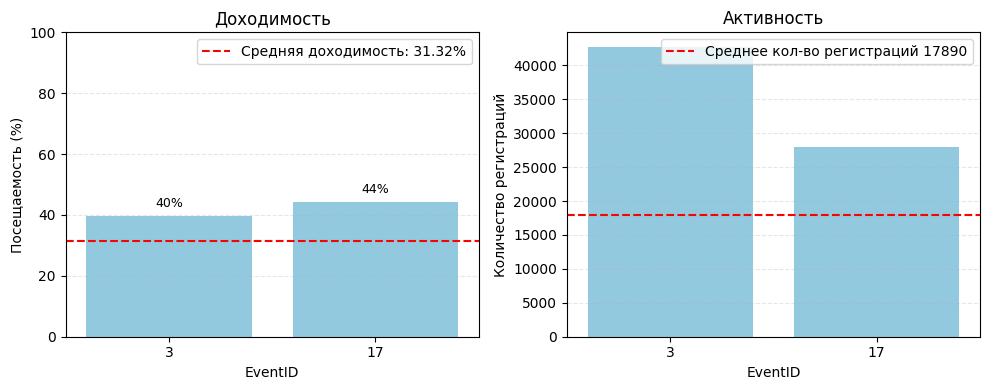

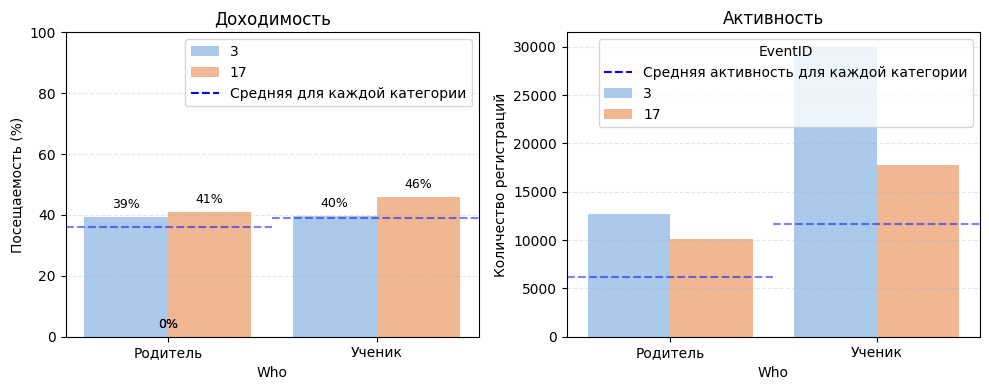

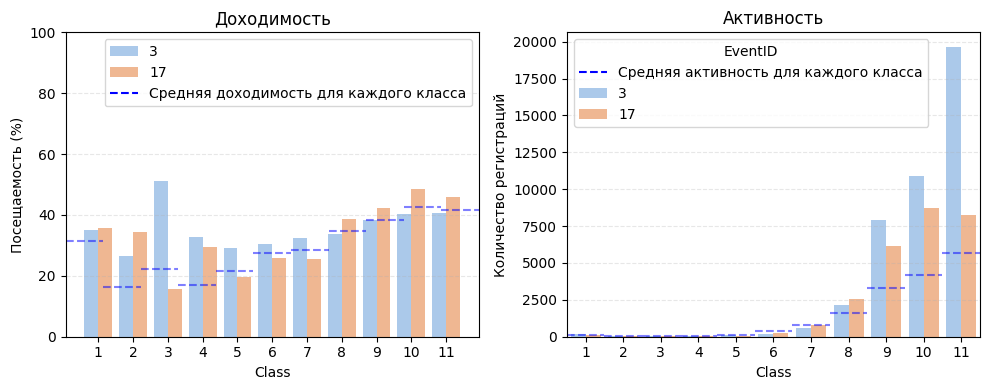

In [ ]:
get_analyz_by(new_reg, [3, 17])

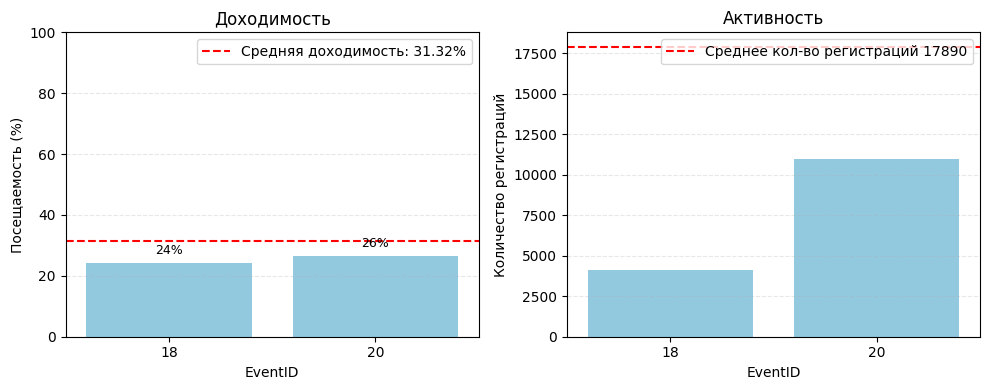

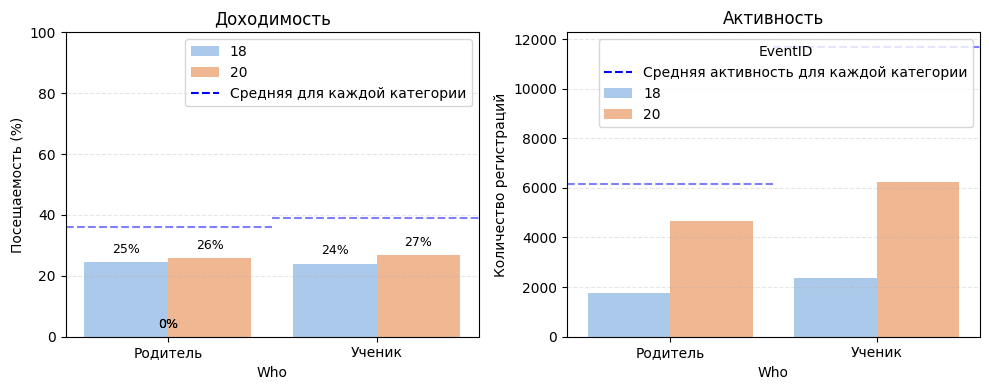

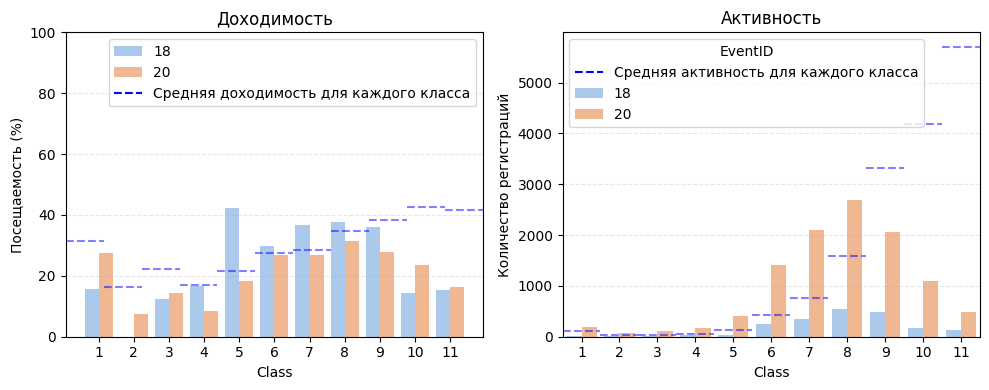

In [ ]:
get_analyz_by(new_reg, [18, 20])

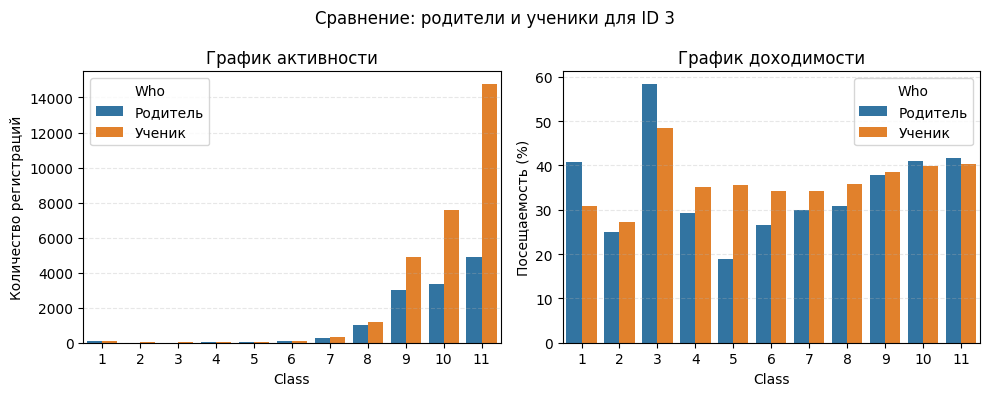

In [ ]:
# –ü–æ—Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Å–∏—Ç—É–∞—Ü–∏—é —Å –∫–ª–∞—Å—Å–∞–º–∏ –ø–æ–±–ª–∏–∂–µ:
for_event = 3 # —Å—Ç–∞–≤—å—Ç–µ —Å—é–¥–∞ –∞–π–¥–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ —Å–º–æ—Ç—Ä–∏—Ç–µ

df = get_attendance(by=['Who', 'Class'], df=new_reg[(new_reg['Who'] != '–î—Ä—É–≥–æ–µ') & (new_reg['EventID'].isin([for_event]))])
df = df[df['Class'] <= 11]
df['Class'] = df['Class'].astype(int).astype(str)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(df, x="Class", y="Registrations_count", hue="Who", ax=axes[0])
axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
axes[0].set_title('–ì—Ä–∞—Ñ–∏–∫ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')


axes[0].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
axes[1].grid(axis='y', linestyle='--', alpha=0.3)  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞

sns.barplot(df, x="Class", y="Attendance", hue="Who", ax=axes[1])
axes[1].set_ylabel('–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å (%)')
axes[1].set_title('–ì—Ä–∞—Ñ–∏–∫ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏')

fig.suptitle(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ: —Ä–æ–¥–∏—Ç–µ–ª–∏ –∏ —É—á–µ–Ω–∏–∫–∏ –¥–ª—è ID {for_event}')
plt.tight_layout()

if SAVE_ALL_PICTS:
    plt.savefig('–†–æ–¥–∏—Ç–µ–ª–∏ –∏ —É—á–µ–Ω–∏–∫–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

**–ú–æ–∏ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è –∏ –≤—ã–≤–æ–¥—ã —Ç–∞–∫–∏–µ:**  
–•—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø–æ—Ä—è–¥–æ–∫ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π: 15 -> 3 -> 17 -> 18 -> 20
* –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ 15 –ø–µ—Ä–≤–æ–µ –≤ —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –ø–æ—Ä—è–¥–∫–µ: –æ—à–∏–±–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã —Å –ø–ª–æ—Ö–æ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–µ–π, –Ω–µ—É–¥–∞—á–Ω—ã–º –ø–µ—Ä–≤—ã–º –æ–ø—ã—Ç–æ–º.
* –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ 3 –Ω–∞–∏–±–æ–ª–µ–µ –º–∞—Å—Å–æ–≤–æ–µ –∑–∞ —Å—á–µ—Ç 11 –∫–ª–∞—Å—Å–∞ (–±–æ–ª—å—à–æ–π –∏–Ω—Ç–µ—Ä–µ—Å). –î–∞–ª–µ–µ –∏—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–∏–µ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —Å–Ω–∏–∂–∞—é—Ç—Å—è (–ø—Ä–∏—á–µ–º –¥–æ–≤–æ–ª—å–Ω–æ —Å–∏–ª—å–Ω–æ). –û—á–µ–≤–∏–¥–Ω–æ, –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ —ç–∫–∑–∞–º–µ–Ω–æ–≤ –æ—Ç—Ç—è–≥–∏–≤–∞–µ—Ç –≤–Ω–∏–º–∞–Ω–∏–µ 11-–∫–ª–∞—Å—Å–Ω–∏–∫–æ–≤.
* –ü–æ—Å–ª–µ–¥–Ω–∏–µ 2 –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –æ—Å–Ω–æ–≤–Ω–æ–º 7-9 –∫–ª–∞—Å—Å–∞–º–∏ (–ø—Ä–∏ —ç—Ç–æ–º, –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å 3-17 –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è–º–∏ –ª—é–¥–µ–π —Å—Ç–∞–ª–æ —Å–∏–ª—å–Ω–æ –º–µ–Ω—å—à–µ)
* –£—á–µ–Ω–∏–∫–∏ –±–æ–ª—å—à–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã –≤ —Ç–µ–º–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è
* –î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å —É—á–µ–Ω–∏–∫–æ–≤ –∏ —Ä–æ–¥–∏—Ç–µ–ª–µ–π –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–∞

–ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –ø–æ —ç—Ç–æ–º—É –ø–æ–≤–æ–¥—É?
1. –ù–∏–∑–∫–∏–π –∏–Ω—Ç–µ—Ä–µ—Å –≤–æ –≤—Ä–µ–º—è –ø–µ—Ä–≤–æ–π –≤—Å—Ç—Ä–µ—á–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω —Å –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å—é –ª—é–¥–µ–π –æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–∏
2. –ó–∞—Ç–µ–º –∏–Ω—Ç–µ—Ä–µ—Å —Å–∏–ª—å–Ω–æ —Ä–∞—Å—Ç–µ—Ç - –ø—Ä–∏—Ö–æ–¥–∏—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ª—é–¥–µ–π (–æ—Å–æ–±–µ–Ω–Ω–æ –≤—ã–ø—É—Å–∫–Ω–∏–∫–æ–≤) [—ç—Ç–æ –ø–µ—Ä–∏–æ–¥ –æ–∫—Ç—è–±—Ä—è]
3. –ü–æ—Å–ª–µ –Ω–∞–±–ª—é–¥–∞–µ–º —Å–ø–∞–¥ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ - –æ—Å–æ–±–µ–Ω–Ω–æ —É —É—á–µ–Ω–∏–∫–æ–≤ —Å —ç–∫–∑–∞–º–µ–Ω–∞–º–∏ (–ª–æ–≥–∏—á–Ω–æ, –≤ —Ñ–µ–≤—Ä–∞–ª–µ –≤—Å–µ —É–∂–µ –≥–æ—Ç–æ–≤—è—Ç—Å—è –∫ –ï–ì–≠/–û–ì–≠). –í–æ–∑–º–æ–∂–Ω–æ, —Ç–µ–º–∞ –∏–∑–∂–∏–ª–∞ —Å–µ–±—è (–µ—Å–ª–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ –ø—Ä–æ–≤–æ–¥–∏–ª–æ—Å—å –æ—á–Ω–æ –≤ –æ–¥–Ω–æ–º –∏ —Ç–æ–º –∂–µ —Ä–∞–π–æ–Ω–µ)

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
* –í –Ω–∞—á–∞–ª–µ —É—á–µ–±–Ω–æ–≥–æ –≥–æ–¥–∞ –¥–µ–ª–∞—Ç—å —É–ø–æ—Ä –Ω–∞ —Å—Ç–∞—Ä—à—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é - –æ–Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–∞ –∏ –∞–∫—Ç–∏–≤–Ω–∞ –≤ —ç—Ç–æ –≤—Ä–µ–º—è
* –í —Å–µ—Ä–µ–¥–∏–Ω–µ –≥–æ–¥–∞ (—Ç.–µ. –≤ —Ñ–µ–≤—Ä–∞–ª–µ-–º–∞—Ä—Ç–µ) —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å —É–ø–æ—Ä –Ω–∞ –±—É–¥—É—â–∏—Ö –≤—ã–ø—É—Å–∫–Ω–∏–∫–æ–≤: 7-8 –∏ 10 –∫–ª–∞—Å—Å—ã, —É –Ω–∏—Ö –∫–∞–∫ —Ä–∞–∑ –µ—Å—Ç—å –≤—Ä–µ–º—è –Ω–∞ —Ç–∞–∫–∏–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –æ–Ω–∏ —É–∂–µ –¥–æ–ª–∂–Ω—ã –±—ã–ª–∏ –Ω–∞—á–∞—Ç—å –¥—É–º–∞—Ç—å –æ —Å–≤–æ–µ–º –±—É–¥—É—â–µ–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏

utm_source  Registrations_count  Visits_count  Attendance
13         organic                17943          8804   49.066488
28          yandex                 1500           729   48.600000
1         Mailigen                 4083          1513   37.056086
25              vk                 3462          1238   35.759676
16  propostuplenie                 6421          2205   34.340445
6               fb                 7345          1805   24.574541

utm_source  Registrations_count  Visits_count  Attendance
25          yandex                  907           574   63.285557
6           google                  780           459   58.846154
13         organic                 9410          5328   56.620616
15  propostuplenie                 3073          1360   44.256427
19              vk                 2171           806   37.125749

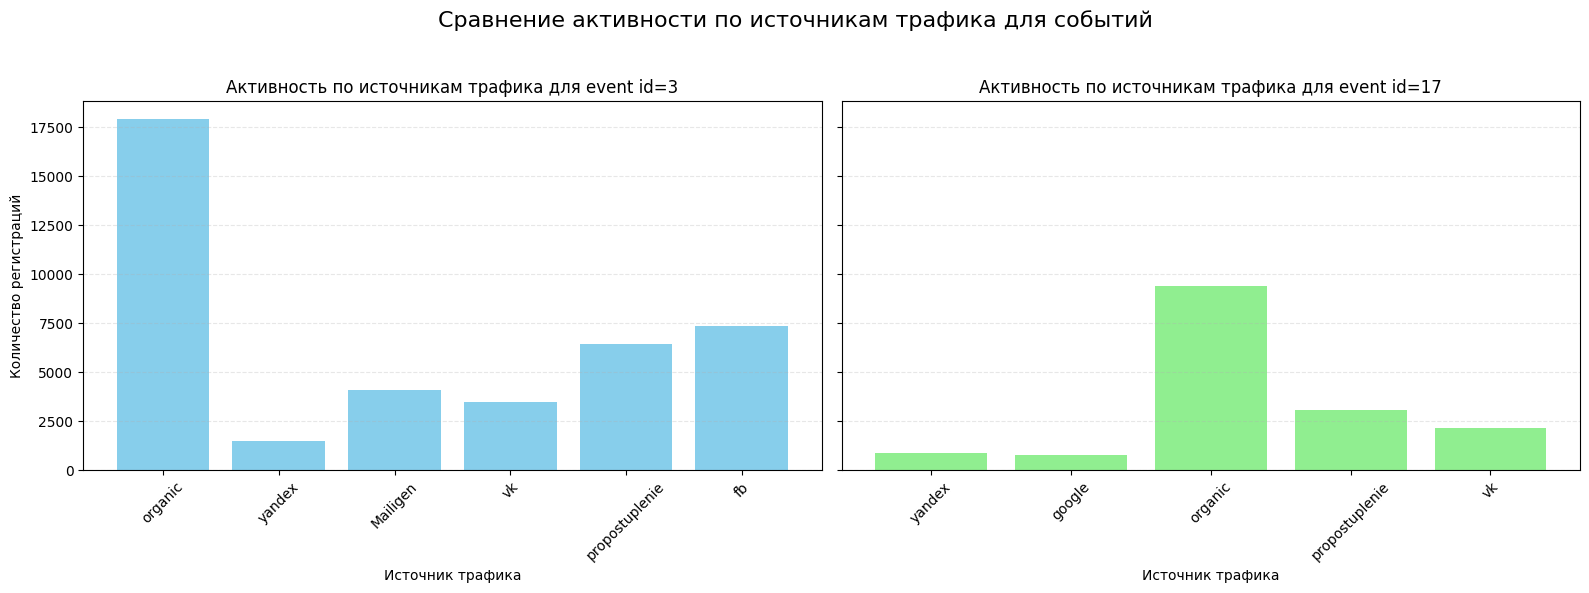

In [ ]:
c1 = 3
c2 = 17

df_event_3  = new_reg[new_reg['ExhibitionID'] == c1].copy() # –º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Ü–∏—Ñ—Ä—ã –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è/–ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–∞–∑–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π
df_event_17 = new_reg[new_reg['ExhibitionID'] == c2].copy() # –º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Ü–∏—Ñ—Ä—ã –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è/–ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–∞–∑–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π

lst = ['Registrations_count', 'Attendance']
what = lst[0] # –≤—ã–±—Ä–∞—Ç—å: –≤—ã–≤–µ—Å—Ç–∏ –≥—Ä–∞—Ñ–∏–∫ –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –ª–∏–±–æ –ø–æ –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏

# –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è event id=3
df_3 = get_attendance(by='utm_source', df=df_event_3)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ—Ä–æ–≥ –¥–ª—è "–î—Ä—É–≥–æ–µ" –Ω–∞ –æ—Å–Ω–æ–≤–µ 2.5% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π
border_3 = df_3['Registrations_count'].sum() * 0.025

# –°—É–º–º–∏—Ä—É–µ–º –º–µ–ª–∫–∏–µ –≥—Ä—É–ø–ø—ã
small_groups_3 = df_3[df_3['Registrations_count'] < border_3].sum()

# –£–±–∏—Ä–∞–µ–º –º–µ–ª–∫–∏–µ –≥—Ä—É–ø–ø—ã
df_3 = df_3[df_3['Registrations_count'] >= border_3]

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ "Attendance" –∏ –≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø-5
df_3 = df_3.sort_values(by='Attendance', ascending=False)
top_5_3 = df_3.iloc[:6]

# –í—Å–µ, —á—Ç–æ –Ω–µ –ø–æ–ø–∞–ª–æ –≤ —Ç–æ–ø-5, –¥–æ–±–∞–≤–ª—è–µ–º –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é "–î—Ä—É–≥–æ–µ"
if len(df_3) > 6:
    other_groups_3 = df_3.iloc[5:].sum()
    top_5_3.loc[len(top_5_3)] = [
        '–î—Ä—É–≥–æ–µ',
        other_groups_3['Registrations_count'],
        other_groups_3['Visits_count'],
        other_groups_3['Visits_count'] / other_groups_3['Registrations_count'] * 100,
    ]

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤—ã–π DataFrame –ø–æ "Attendance" –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è
top_5_3 = top_5_3.sort_values(by='Attendance', ascending=False)

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ "Attendance"
avg_attendance_3 = df_3['Attendance'].mean()

# –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è event id=17
df_17 = get_attendance(by='utm_source', df=df_event_17)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ—Ä–æ–≥ –¥–ª—è "–î—Ä—É–≥–æ–µ" –Ω–∞ –æ—Å–Ω–æ–≤–µ 2.5% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π
border_17 = df_17['Registrations_count'].sum() * 0.025

# –°—É–º–º–∏—Ä—É–µ–º –º–µ–ª–∫–∏–µ –≥—Ä—É–ø–ø—ã
small_groups_17 = df_17[df_17['Registrations_count'] < border_17].sum()

# –£–±–∏—Ä–∞–µ–º –º–µ–ª–∫–∏–µ –≥—Ä—É–ø–ø—ã
df_17 = df_17[df_17['Registrations_count'] >= border_17]

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ "Attendance" –∏ –≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø-5
df_17 = df_17.sort_values(by='Attendance', ascending=False)
top_5_17 = df_17.iloc[:5]

# –í—Å–µ, —á—Ç–æ –Ω–µ –ø–æ–ø–∞–ª–æ –≤ —Ç–æ–ø-5, –¥–æ–±–∞–≤–ª—è–µ–º –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é "–î—Ä—É–≥–æ–µ"
if len(df_17) > 5:
    other_groups_17 = df_17.iloc[5:].sum()
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º pd.concat –¥–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –Ω–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏
    other_row_17 = pd.DataFrame({
        'utm_source': ['–î—Ä—É–≥–æ–µ'],
        'Registrations_count': [other_groups_17['Registrations_count']],
        'Visits_count': [other_groups_17['Visits_count']],
        'Attendance': [other_groups_17['Visits_count'] / other_groups_17['Registrations_count'] * 100]
    })

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤—ã–π DataFrame –ø–æ "Attendance" –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è
top_5_17 = top_5_17.sort_values(by='Attendance', ascending=False)

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ "Attendance"
avg_attendance_17 = df_17['Attendance'].mean()

# –°–æ–∑–¥–∞—ë–º –≥—Ä–∞—Ñ–∏–∫–∏ –Ω–∞ –æ–¥–Ω–æ–º –ø–æ–ª–æ—Ç–Ω–µ
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# –õ–µ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: event id=3
axes[0].bar(top_5_3['utm_source'], top_5_3[what], color='skyblue') #Attendance
if what == 'Attendance':
    axes[0].axhline(y=avg_attendance_3, color='red', linestyle='--', label=f'–°—Ä–µ–¥–Ω—è—è: {avg_attendance_3:.2f}%')
if what == 'Attendance':
    axes[0].set_title(f'–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c1}')
else:
    axes[0].set_title(f'–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c1}')
axes[0].set_xlabel('–ò—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞')
axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π')
if what == 'Attendance':
    axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# –ü—Ä–∞–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: event id=17
axes[1].bar(top_5_17['utm_source'], top_5_17[what], color='lightgreen')
if what == 'Attendance':
    axes[1].axhline(y=avg_attendance_17, color='red', linestyle='--', label=f'–°—Ä–µ–¥–Ω—è—è: {avg_attendance_17:.2f}%')
if what == 'Attendance':
    axes[1].set_title(f'–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c2}')
else:
    axes[1].set_title(f'–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c2}')
axes[1].set_xlabel('–ò—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞')
if what == 'Attendance':
    axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –æ–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫
if what == 'Attendance':
    fig.suptitle('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è —Å–æ–±—ã—Ç–∏–π', fontsize=16)
else:
    fig.suptitle('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è —Å–æ–±—ã—Ç–∏–π', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
if SAVE_ALL_PICTS:
    plt.savefig('p4.png', format='png', dpi=100, bbox_inches='tight')
display(top_5_3)
display(top_5_17)

**–ß—Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å:**
* –£ –º–µ–Ω–µ–µ –º–∞—Å—Å–æ–≤—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π (15, 18 –∏ 20) –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –∏—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞ - —Ñ–µ–π—Å–±—É–∫ (–Ω–∞ –Ω–µ–≥–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –±–æ–ª–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –≤—Å–µ—Ö –∑–∞—è–≤–æ–∫) –ø—Ä–∏ —ç—Ç–æ–º —Ö—É–¥—à–∏–π –ø–æ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ç—Ä–∞—Ñ–∏–∫ —Ç–∞–∫–∂–µ —Ñ–µ–π—Å–±—É–∫.
* –£ –±–æ–ª–µ–µ –º–∞—Å—Å–æ–≤—ã—Ö (3, 17) –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –∏—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞ - –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π, –∫–æ—Ç–æ—Ä—ã–π —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à—É—é –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
* –ò—Ç–∞–∫, –≤–∏–¥–∏–º–æ –∫–∞–∫–∞—è-—Ç–æ –≤–Ω–µ—à–Ω—è—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–∏–≤–ª–µ–∫–∞–µ—Ç –ª—é–¥–µ–π –Ω–∞–∏–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –ø–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é –º–∞—Å—Å–æ–≤–æ—Å—Ç–∏ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –Ω–∞–∑–Ω–∞—á–∏—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–º –∏—Å—Ç–æ—á–Ω–∏–∫–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π –∏ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞–¥ —É–ª—É—á—à–µ–Ω–∏—è–º–∏ –∑–¥–µ—Å—å –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å.
* –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –ø–µ—Ä–µ–Ω–æ—Å —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ —Ç—Ä–∞—Ñ–∏–∫–∞ —Å —Å–æ—Ü —Å–µ—Ç–µ–π (–≤–∫, —Ñ–µ–π—Å–±—É–∫) –Ω–∞ –ø–æ–∏—Å–∫–æ–≤—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã (—è–Ω–¥–µ–∫—Å, –≥—É–≥–ª). –í —Ü–µ–ª–æ–º —Ä–∞–Ω–µ–µ –ø–∏—Å–∞–ª–∞ –ø–æ—á–µ–º—É —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–≥–æ–¥–Ω–æ.

utm_source utm_medium  Registrations_count  Visits_count  Attendance  \
18         organic    organic                17943          8804   49.066488   
64          yandex        cpc                 1462           715   48.905609   
1         Mailigen      email                 3980          1478   37.135678   
37  propostuplenie     banner                 6245          2138   34.235388   
52              vk        cpc                 1586           481   30.327869   
8               fb        cpa                 7211          1766   24.490362   

    utm_source + utm_medium  
18        organic + organic  
64             yandex + cpc  
1          Mailigen + email  
37  propostuplenie + banner  
52                 vk + cpc  
8                  fb + cpa

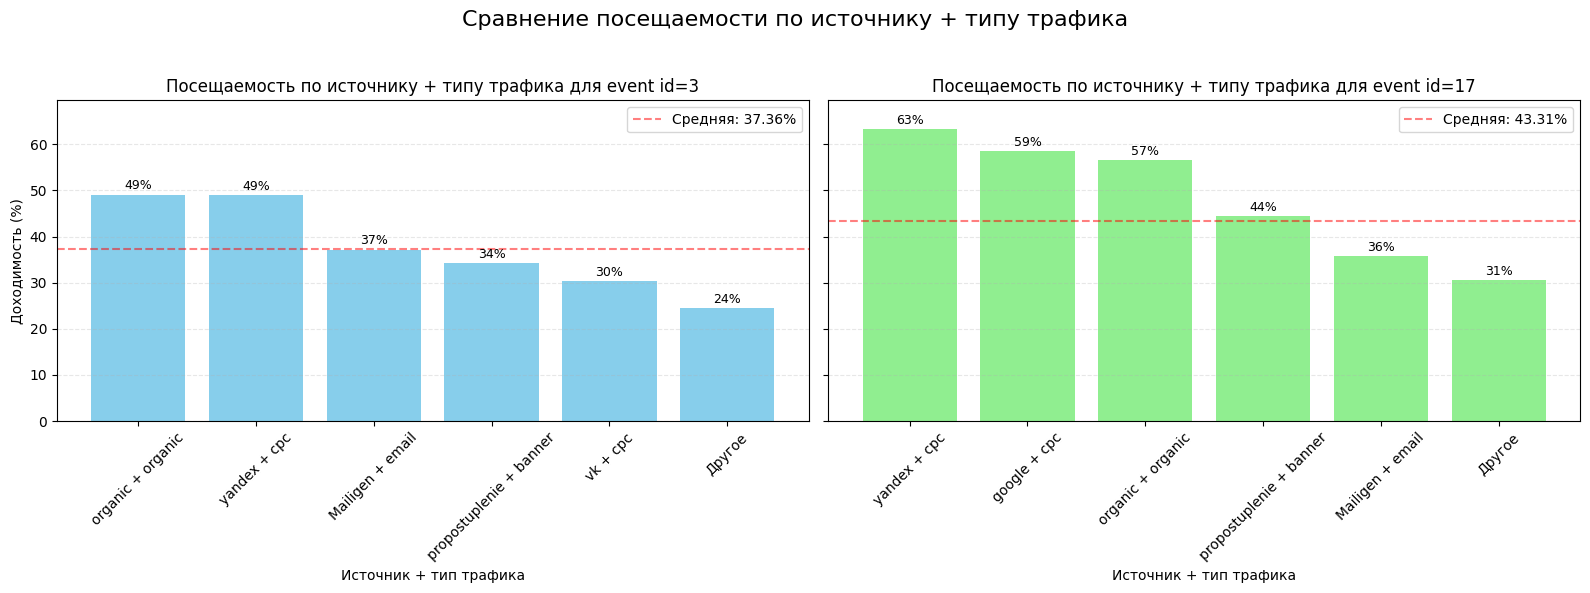

In [ ]:
# df_3, df_17 - –∑–∞–≤–∏—Å—è—Ç –æ—Ç c1, c2 –∏–∑ –ø—Ä–æ—à–ª–æ–π —è—á–µ–π–∫–∏ –∫–æ–¥–∞!

# –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è event id=3
df_3 = get_attendance(by=['utm_source', 'utm_medium'], df=df_event_3)
df_3['utm_source + utm_medium'] = df_3['utm_source'] + ' + ' + df_3['utm_medium']
border_3 = df_3['Registrations_count'].sum() * 0.025
df_3 = df_3[df_3['Registrations_count'] >= border_3]
df_3 = df_3.sort_values(by='Attendance', ascending=False)


display(df_3)
# –°–æ–∑–¥–∞—ë–º –∫–æ–ø–∏—é –¥–ª—è top_5_3
top_5_3 = df_3.iloc[:5].copy()
if len(df_3) > 5:
    other_groups_3 = df_3.iloc[5:].sum()
    top_5_3.loc[len(top_5_3)] = [
        '–î—Ä—É–≥–æ–µ', '–î—Ä—É–≥–æ–µ',
        other_groups_3['Registrations_count'],
        other_groups_3['Visits_count'],
        other_groups_3['Visits_count'] / other_groups_3['Registrations_count'] * 100,
        '–î—Ä—É–≥–æ–µ'
    ]
top_5_3 = top_5_3.sort_values(by='Attendance', ascending=False)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è event id=17
df_17 = get_attendance(by=['utm_source', 'utm_medium'], df=df_event_17)
df_17['utm_source + utm_medium'] = df_17['utm_source'] + ' + ' + df_17['utm_medium']
border_17 = df_17['Registrations_count'].sum() * 0.025
df_17 = df_17[df_17['Registrations_count'] >= border_17]
df_17 = df_17.sort_values(by='Attendance', ascending=False)

# –°–æ–∑–¥–∞—ë–º –∫–æ–ø–∏—é –¥–ª—è top_5_17
top_5_17 = df_17.iloc[:5].copy()
if len(df_17) > 5:
    other_groups_17 = df_17.iloc[5:].sum()
    top_5_17.loc[len(top_5_17)] = [
        '–î—Ä—É–≥–æ–µ', '–î—Ä—É–≥–æ–µ',
        other_groups_17['Registrations_count'],
        other_groups_17['Visits_count'],
        other_groups_17['Visits_count'] / other_groups_17['Registrations_count'] * 100,
        '–î—Ä—É–≥–æ–µ'
    ]
top_5_17 = top_5_17.sort_values(by='Attendance', ascending=False)

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ "Attendance"
avg_attendance_3 = df_3['Attendance'].mean()
avg_attendance_17 = df_17['Attendance'].mean()
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# –õ–µ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: event id=3
axes[0].axhline(y=avg_attendance_3, color='red', linestyle='--', label=f'–°—Ä–µ–¥–Ω—è—è: {avg_attendance_3:.2f}%', alpha=0.5) # –°—Ä–µ–¥–Ω–µ–µ
bars_3 = axes[0].bar(top_5_3['utm_source + utm_medium'], top_5_3['Attendance'], color='skyblue')
axes[0].set_title(f'–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫—É + —Ç–∏–ø—É —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c1}')
axes[0].set_xlabel('–ò—Å—Ç–æ—á–Ω–∏–∫ + —Ç–∏–ø —Ç—Ä–∞—Ñ–∏–∫–∞')
axes[0].set_ylabel('–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫
max_height_3 = 0  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —Å—Ç–æ–ª–±—Ü–∞
for bar in bars_3:
    height = bar.get_height()
    max_height_3 = max(max_height_3, height)
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # –ù–µ–º–Ω–æ–≥–æ –≤—ã—à–µ —Å—Ç–æ–ª–±—Ü–∞
        f"{height:.0f}%",  # –ü—Ä–æ—Ü–µ–Ω—Ç
        ha='center', va='bottom', fontsize=9
    )
axes[0].set_ylim(0, max_height_3 * 1.1)  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –≤–µ—Ä—Ö–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É

# –ü—Ä–∞–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: event id=17
axes[1].axhline(y=avg_attendance_17, color='red', linestyle='--', label=f'–°—Ä–µ–¥–Ω—è—è: {avg_attendance_17:.2f}%', alpha=0.5) # –°—Ä–µ–¥–Ω–µ–µ
bars_17 = axes[1].bar(top_5_17['utm_source + utm_medium'], top_5_17['Attendance'], color='lightgreen')
axes[1].set_title(f'–ü–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫—É + —Ç–∏–ø—É —Ç—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è event id={c2}')
axes[1].set_xlabel('–ò—Å—Ç–æ—á–Ω–∏–∫ + —Ç–∏–ø —Ç—Ä–∞—Ñ–∏–∫–∞')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫
max_height_17 = 0  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —Å—Ç–æ–ª–±—Ü–∞
for bar in bars_17:
    height = bar.get_height()
    max_height_17 = max(max_height_17, height)
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # –ù–µ–º–Ω–æ–≥–æ –≤—ã—à–µ —Å—Ç–æ–ª–±—Ü–∞
        f"{height:.0f}%",  # –ü—Ä–æ—Ü–µ–Ω—Ç
        ha='center', va='bottom', fontsize=9
    )
axes[1].set_ylim(0, max_height_17 * 1.1)  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –≤–µ—Ä—Ö–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –æ–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫
fig.suptitle('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫—É + —Ç–∏–ø—É —Ç—Ä–∞—Ñ–∏–∫–∞', fontsize=16)

# –ü–æ–¥–≥–æ–Ω—è–µ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.tight_layout(rect=[0, 0, 1, 0.95])


if SAVE_ALL_PICTS:
    plt.savefig('p5.png', format='png', dpi=100, bbox_inches='tight')

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫–∏
plt.show()


### 6. **–ì–∏–ø–æ—Ç–µ–∑–∞ 4**: –í–æ–∑–º–æ–∂–Ω–æ –∏—Å—Ç–æ—á–Ω–∏–∫ —Ç—Ä–∞—Ñ–∏–∫–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å?

In [ ]:
new_reg['Attendance'] = new_reg.groupby(['utm_source', 'utm_medium'])['VisitID'].transform('count') / new_reg.groupby(['utm_source', 'utm_medium'])['RegistrationID'].transform('count') * 100

**–î–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞**:

**–¶–µ–ª—å —Ç–µ—Å—Ç–∞** - –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–∞–ª–∏—á–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –∏—Å—Ç–æ—á–Ω–∏–∫–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ (utm_source) –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é.

**–ú–µ—Ç–æ–¥–∏–∫–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è** - –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ ùõº = 0.01.

–ï—Å–ª–∏ p-–∑–Ω–∞—á–µ–Ω–∏–µ < 0.01, —Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è.

**–≠—Ç–∞–ø—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:

- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é utm_source.
- –†–∞–∑–¥–µ–ª–∏—Ç—å –≤—ã–±–æ—Ä–∫–∏ –ø–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π utm_source.
- –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞. –ï—Å–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –¥–ª—è –≤—Å–µ—Ö –≥—Ä—É–ø–ø, –ø—Ä–∏–º–µ–Ω–∏—Ç—å —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞.
- –ü—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.

In [ ]:
from scipy.stats import shapiro, kruskal

# –°–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫—É —Ç—Ä–∞—Ñ–∏–∫–∞
sources = new_reg['utm_source'].unique()

# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–∞
data_for_test_by_source = [new_reg[new_reg['utm_source'] == source]['Attendance'] for source in sources]

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞
for source in sources:
    group_data = new_reg[new_reg['utm_source'] == source]['Attendance']
    if len(group_data) >= 3:
        _, p_value = shapiro(group_data)

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ç–µ—Å—Ç–∞ –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞, –µ—Å–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –¥–ª—è –≤—Å–µ—Ö –≥—Ä—É–ø–ø
stat, p_value = kruskal(*data_for_test_by_source)

print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: {stat}, p-value: {p_value}")

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
if p_value < 0.01:
    print("–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫–∞ —Ç—Ä–∞—Ñ–∏–∫–∞.")
else:
    print("–ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º —Ç—Ä–∞—Ñ–∏–∫–∞.")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30380.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8139.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24022.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: 86287.59508414363, p-value: 0.0
–î–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫–∞ —Ç—Ä–∞—Ñ–∏–∫–∞.


**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ—Å—Ç–∞ –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: 86287
- p-value ‚âà 0.0

**–í—ã–≤–æ–¥**:

–¢–∞–∫ –∫–∞–∫ p-value < 0.01, –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º–∏ —Ç—Ä–∞—Ñ–∏–∫–∞.

### 7. **–ì–∏–ø–æ—Ç–µ–∑–∞ 5**: –í–æ–∑–º–æ–∂–Ω–æ —Ç–∏–ø —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å?

**–î–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞**:

**–¶–µ–ª—å —Ç–µ—Å—Ç–∞** - –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–∞–ª–∏—á–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —Ç–∏–ø–æ–º —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ (utm_medium) –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é.

**–ú–µ—Ç–æ–¥–∏–∫–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è** - –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ ùõº = 0.01.

–ï—Å–ª–∏ p-–∑–Ω–∞—á–µ–Ω–∏–µ < 0.01, —Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è.

**–≠—Ç–∞–ø—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:

- –í—ã–¥–µ–ª–∏—Ç—å —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π utm_medium, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–µ —Ç–∏–ø—ã —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–Ω–∞–ª–æ–≤.
- –°–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π utm_medium, –∏—Å–∫–ª—é—á–∞—è –≥—Ä—É–ø–ø—ã —Å —á–∏—Å–ª–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –º–µ–Ω–µ–µ 3.
- –ü—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ *(–¢–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ —á–∞—Å—Ç–æ –Ω–∞–∑—ã–≤–∞—é—Ç "—Ä–∞–Ω–≥–æ–≤—ã–º –∞–Ω–∞–ª–æ–≥–æ–º –•–∏-–∫–≤–∞–¥—Ä–∞—Ç-—Ç–µ—Å—Ç–∞")* –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.

In [ ]:
from scipy.stats import kruskal

# –ü—Ä–∏–º–µ–Ω–∏–º —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ –¥–ª—è —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–Ω–∞–ª–æ–≤
channels = new_reg['utm_medium'].unique()

# –°–æ–∑–¥–∞—ë–º —Å–ø–∏—Å–æ–∫ –¥–ª—è –ø–µ—Ä–µ–¥–∞—á–∏ –≤ —Ç–µ—Å—Ç
data_for_test = [new_reg[new_reg['utm_medium'] == channel]['Attendance'] for channel in channels if len(new_reg[new_reg['utm_medium'] == channel]) >= 3]

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞
h_stat, p_value = kruskal(*data_for_test)

print(f"–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {h_stat}, p-value: {p_value}")

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
if p_value < 0.01:
    print("–¢–∏–ø —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å.")
else:
    print("–¢–∏–ø —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å.")


–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 77219.04315344561, p-value: 0.0
–¢–∏–ø —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å.


**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ—Å—Ç–∞ –ö—Ä–∞—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: 77219
- p-value ‚âà 0.0

**–í—ã–≤–æ–¥**:

–¢–∞–∫ –∫–∞–∫ p-value < 0.01, –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —Ç–∏–ø–∞–º–∏ —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–Ω–∞–ª–æ–≤. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ —Ç–∏–ø —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π.

### 8. **–ì–∏–ø–æ—Ç–µ–∑–∞ 6**: –í–æ–∑–º–æ–∂–Ω–æ, –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π?

**–î–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞**:

**–¶–µ–ª—å —Ç–µ—Å—Ç–∞** - –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–∞–ª–∏—á–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ (utm_source + utm_medium) –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é.

**–ú–µ—Ç–æ–¥–∏–∫–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è** - –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ ùõº = 0.01.

–ï—Å–ª–∏ p-–∑–Ω–∞—á–µ–Ω–∏–µ < 0.01, —Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è.

**–≠—Ç–∞–ø—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é utm_source + utm_medium
- –†–∞–∑–¥–µ–ª–∏—Ç—å –≤—ã–±–æ—Ä–∫–∏ –ø–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π utm_source + utm_medium
- –ü—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.


In [ ]:
from scipy.stats import shapiro, kruskal

# –ö–æ–º–±–∏–Ω–∏—Ä—É–µ–º 'utm_source' –∏ 'utm_medium' –≤ –æ–¥–Ω—É –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
new_reg['source_medium'] = new_reg['utm_source'] + ' ' + new_reg['utm_medium']

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞
stat, p_value = stats.kruskal(*[new_reg[new_reg['source_medium'] == group]['Attendance']
                               for group in new_reg['source_medium'].unique()])

print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: {stat}, p-value: {p_value}")

if p_value < 0.01:
    print("–ï—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é.")
else:
    print("–ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.")


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: 89449.00000000001, p-value: 0.0
–ï—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é.


**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**:

- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª–∏—Å–∞: 89449
- ùëù-value ‚âà 0.0

**–í—ã–≤–æ–¥**:

–¢–∞–∫ –∫–∞–∫ ùëù-–∑–Ω–∞—á–µ–Ω–∏–µ < 0.01, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–µ—Å—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º.
–°—É—â–µ—Å—Ç–≤—É–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å—é. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫–∞ —Ç—Ä–∞—Ñ–∏–∫–∞ –∏ –∫–∞–Ω–∞–ª–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è.

–ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –Æ—Ä—ã:

1. **–ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç—Ä–∞—Ñ–∏–∫–∞ –ø–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞–º –∏ –∫–∞–Ω–∞–ª–∞–º**:
   - **Facebook (fb + cpa)** –≤ –æ–±–æ–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π, –æ–¥–Ω–∞–∫–æ –µ–≥–æ **–¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å** –æ—Å—Ç–∞—ë—Ç—Å—è –Ω–∏–∑–∫–æ–π (20.23 –∏ 25.45). –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ Facebook –ø—Ä–∏–≤–ª–µ–∫–∞–µ—Ç –º–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –Ω–æ –Ω–µ –≤—Å–µ –∏–∑ –Ω–∏—Ö –≤—ã–ø–æ–ª–Ω—è—é—Ç —Ü–µ–ª–µ–≤—ã–µ –¥–µ–π—Å—Ç–≤–∏—è.
   - **VK (vk + cpc)** —Ç–∞–∫–∂–µ —è–≤–ª—è–µ—Ç—Å—è –∏—Å—Ç–æ—á–Ω–∏–∫–æ–º —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ (25.16 –∏ 24.94), —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –º–µ–Ω–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –¥—Ä—É–≥–∏—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤.
   - **Propostuplenie (propostuplenie + banner)** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à—É—é –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å (37.75 –∏ 37.70), —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤—ã—Å–æ–∫–∏–π –æ—Ç–∫–ª–∏–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø—Ä–∏ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏—Ö —É—Ä–æ–≤–Ω—è—Ö —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏. –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –∫–∞–Ω–∞–ª –æ—á–µ–Ω—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–µ–Ω –≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.
   - **Organic (organic + organic)** —Ç–∞–∫–∂–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—ã—Å–æ–∫—É—é –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å (37.75 –∏ 24.45). –≠—Ç–æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º.

2. **–¢—Ä–µ–Ω–¥—ã**:
   - –ò—Å—Ç–æ—á–Ω–∏–∫ **organic** –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –æ–±–æ–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏ –≤—ã—Å–æ–∫—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —ç—Ç–æ–≥–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞.
   - –†–µ–∫–ª–∞–º–Ω—ã–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ **FB** –∏ **VK**, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç **organic** –∏–ª–∏ **propostuplenie**, –∏–º–µ—é—Ç –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π, —Ç–∞–∫ –∫–∞–∫ –≤—ã—Å–æ–∫–∞—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –Ω–µ —á–∞—Å—Ç–æ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –≤ –¥–µ–π—Å—Ç–≤–∏—è.

3. **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏**:
   - **–†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –±—é–¥–∂–µ—Ç–∞ –Ω–∞ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π —Ç—Ä–∞—Ñ–∏–∫ (organic)**, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –æ—Ç–ª–∏—á–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –∏ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏. –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–Ω–≤–µ—Ä—Å–∏—é –±–µ–∑ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –∑–∞—Ç—Ä–∞—Ç –Ω–∞ —Ä–µ–∫–ª–∞–º—É.
   - **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–Ω–∞–ª–æ–≤**. –î–ª—è **Facebook** –∏ **VK** —Å—Ç–æ–∏—Ç –ø–æ–¥—É–º–∞—Ç—å –æ –ø–µ—Ä–µ—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –±—é–¥–∂–µ—Ç–∞, –≤–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ä–µ–∫–ª–∞–º–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —Ñ–æ—Ä–º–∞—Ç–æ–≤ —Ä–µ–∫–ª–∞–º—ã –∏–ª–∏ —Ç–∞—Ä–≥–µ—Ç–∏–Ω–≥–∞) –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.
   - **–†–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–µ –¥—Ä—É–≥–∏—Ö —Ñ–æ—Ä–º–∞—Ç–æ–≤ —Ä–µ–∫–ª–∞–º—ã**. –ù–∞–ø—Ä–∏–º–µ—Ä, **Propostuplenie + banner** –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —É–º–µ—Ä–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π. –í–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç —É–≤–µ–ª–∏—á–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –∫ —ç—Ç–æ–º—É –∫–∞–Ω–∞–ª—É –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –æ–±—â–µ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.
   - –í–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –∫–∞–∫ –∏—Å—Ç–æ—á–Ω–∏–∫, —Ç–∞–∫ –∏ –∫–∞–Ω–∞–ª —Ç—Ä–∞—Ñ–∏–∫–∞ –ø—Ä–∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π –∏ –∞–Ω–∞–ª–∏–∑–µ –∏—Ö —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –ö–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ —ç—Ç–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ —Ä–µ–∫–ª–∞–º–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π.

### –ö–∞–∫–∏–µ –æ—Å—Ç–∞—é—Ç—Å—è –∑–∞–¥–∞–Ω–∏—è (–Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥):
1. –ü—Ä–µ–¥–ª–æ–∂–∏—Ç—å —Å–≤–æ–∏ –≥–∏–ø–æ—Ç–µ–∑—ã
2. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—ã –Ω–∞ —Å—Ç–∞—Ç–∑–Ω–∞—á–∏–º–æ—Å—Ç—å (–∫–∞–∫–æ–π —Å—Ç–∞—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π?)  
3. ~–°–¥–µ–ª–∞—Ç—å –ø—É–Ω–∫—Ç 3.1 –∏–∑ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π (—Ç.–µ. —Ç–æ –∂–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –Ω–æ –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è)~ ‚úî
4. ~–ü—É–Ω–∫—Ç 5 –∏–∑ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π —Å –ø–æ–ø–∞—Ä–Ω—ã–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º (–∫–∞–∫ —è –ø–æ–Ω–∏–º–∞—é, –Ω—É–∂–Ω–æ –¥–µ–ª–∞—Ç—å –ø–æ–ø—Ä–∞–≤–∫—É –Ω–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ? –∞ –∫–∞–∫–æ–π —Å—Ç–∞—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π?)~ ‚úî
5. ~–ü—É–Ω–∫—Ç 6 –∏–∑ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π~ ‚úî

–¢–∞–∫–∂–µ –ø–∏—à–∏—Ç–µ, –µ—Å–ª–∏ –µ—Å—Ç—å —á—Ç–æ –¥–æ–±–∞–≤–∏—Ç—å/–ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∏–ª–∏ —Å —á–µ–º –Ω–µ —Å–æ–≥–ª–∞—Å–Ω—ã (–≤ —Ç–æ–º —á–∏—Å–ª–µ –ø–æ –≤—ã–≤–æ–¥–∞–º).

–ù—É –∏ –¥—Ä—É–≥–∏–µ –≤–∞—à–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è.